# Sanitation Coverage Evolution in Rio Grande do Sul on the New Brazilian Sanitation Legal Framework and CORSAN privatization: a predictive inference approach

In [1]:
!pip install rpy2

In [2]:
import rpy2

In [3]:
rpy2.__path__

['C:\\Users\\Cristina Tessari\\anaconda3\\lib\\site-packages\\rpy2']

In [4]:
%load_ext rpy2.ipython

C:\Users\Cristina Tessari\anaconda3\lib\site-packages\rpy2\robjects\packages.py:366: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [5]:
import pandas as pd
import numpy as np
df = pd.DataFrame({
    'cups_of_coffee': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'productivity': [2, 5, 6, 8, 9, 8, 0, 1, 0, -1]
})
df.transpose()

,0,1,2,3,4,5,6,7,8,9
cups_of_coffee,0,1,2,3,4,5,6,7,8,9
productivity,2,5,6,8,9,8,0,1,0,-1


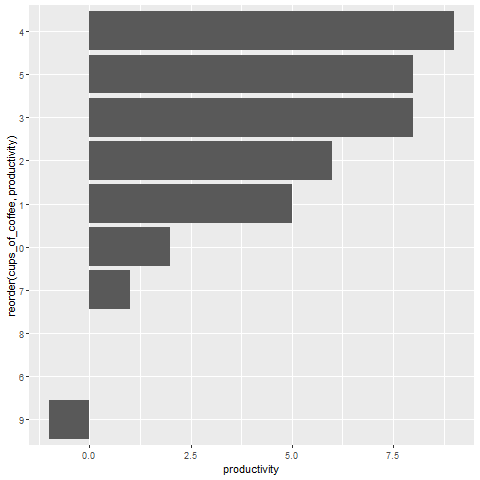

In [6]:
%%R -i df 
library(ggplot2)
ggplot(df, aes(x=reorder(cups_of_coffee,productivity), y=productivity)) + geom_col() + coord_flip()

##### Table of contents

##### 1. Scope of Analysis
   1.1 Description of analysis \
   1.2 Methodology \
   1.3 Hypothesis

##### 2. Importing tools and data

##### 3. Checking the data

##### 4. Data manupulation / Preprocessing
   4.1 Changing the categorical columns (não há) to numerical \
   4.2 Setting column Time to datetime format (não precisa) \
   4.3 Dealing with NAN values (não precisa)

##### 5. EDA: Data explained by descriptive statistics
   5.1 Describing the data \
   5.2 Analyzing PIB, Pop_Total_Agua, Pop_Total_Esgoto, ROD_Total,ROD_Agua, ROD_Esgoto, Invest_Agua_Prestador, Invest_Esgoto_Pretador and Population over time \
   5.3 Plotting and interpretating the results of time series analysis
   
   * Time Series plot 
   * X-Y scatter 
   * Boxplot 
   5.4 Scatterplot Matrix  
   5.5 Correlation Matrix

   
##### 6. Inferential statistics
   6.1 Hypothesis tests


##### 7. Autocorrelation and Unit Root tests
   7.1 Time Series Plots 
   * 7.1.1 STL Decomposition 
   7.2 Correlogram (autocorrelation) \
   7.3 Dickey Fuller test \
   7.4 Cross-correlation \
   7.5 Conclusion of the results so far and the next steps
   
 
##### 8. VAR/VECM 
   8.1  \
   8.2
   
##### 9. Panel Analysis

###### 10. Machine learning analysis
   10.1 Using Train/Test Split on Dataframe \
   10.2 Defining models for linear Regression Sklearn \
   10.3 Using SVR Model, KNeighbors Regressor, DecisionTree Regressor, Gradient Booster, RandomForest Regressor, MLP Regressor, DNN, LSTM, CNN, ResNet \
   10.4 Interpretation of results 


##### 11. Conclusion of Analysis

# 1. Scope of Analysis

**The following analysis is based on . \
See: for source**

##### 1.1 Description of analysis

**Using indicators, the influence of XXXX is statistically evaluated using time series analysis.** The type, strength and interdependence of the examined indicators are checked analytically. The results will be compared with subsequent visualization.

**Parágrafo explicando mais detalhes sobre o problema a ser resolvido.**

But how can interactions between individual indicators be measured and dependence be visualized?

This analysis attempts to provide answers to these questions based on selected indicators through exploratory and inferential data analysis first. Second advanced statistical models are used through machine learning algorithms using Python.



##### 1.2 Methodology

The analysis is based on panel data table we built by indicators. **We do use time series of data from 1995 to 2020 on (descrever).**
    
Indicators used are: PIB, Pop_Total_Agua, Pop_Total_Esgoto, ROD_Total,ROD_Agua, ROD_Esgoto, Invest_Agua_Prestador, Invest_Esgoto_Pretador and Population over time.

##### 1.3 Hypothesis

**Main scope of Hypothesis is the xxxx.**

**Descrição dos indicadores e hipóteses.** 

**Can the Indicator be explained by the other indicators used?**
    Further:
    **Exists a significant impact of xxx on xxx?**
    **How strong is Correlation between indicators and xxxx?**

__Hypothesis 1__

__H0:__ There is no significant influence. **The independent variables cannot explain xxxx.**

__H1:__ There is a significant influence. **The independent variables can explain xxxxx.**

__Hypothesis 2: H1: :__ \
__Hypothesis 3: H1: The xxxx Indicator has significant difference of means along xxxx:__ <br> 
__Hypothesis 4: H1: Panel data of available indicators can explain dependence of xxxx:__ 

# 2. Importing tools and data

In [7]:
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from datetime import datetime

from tqdm.notebook import tqdm

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option('display.max_columns', None)

In [8]:
# Import modules
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Get the current working directory
cwd = os.getcwd()

# Print the current working directory
print("Current working directory: {0}".format(cwd))

# Print the type of the returned object
print("os.getcwd() returns an object of type: {0}".format(type(cwd)))

Current working directory: C:\Users\Cristina Tessari
os.getcwd() returns an object of type: <class 'str'>


In [9]:
print("Current working directory: {0}".format(os.getcwd()))

# Change the current working directory
os.chdir('C:/Users/Cristina Tessari/Documents/TCE/Panel Data')

# Print the current working directory
print("Current working directory: {0}".format(os.getcwd()))

Current working directory: C:\Users\Cristina Tessari
Current working directory: C:\Users\Cristina Tessari\Documents\TCE\Panel Data


Importing panel data and show head, remove index column

In [10]:
df = pd.read_csv('Dados_Agua_Esgoto_v2.csv', sep=';')

#retirar coluna obs
df = df.drop('obs', 1)
#df.head()
display(df)

C:\Users\CRISTI~1\AppData\Local\Temp/ipykernel_13272/1153655802.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('obs', 1)


,Ano,Pop_Total,AG001_Pop_Total_Agua,AG001A_Pop_Total_Agua_Anterior,ES001_Pop_Total_Esgoto,ES001A_Pop_Total_Esgoto_Anterio,FN001_ROD_Total,FN002_ROD_Agua,FN003_ROD_Esgoto,FN023_Invest_Agua_Prestador,FN024_Invest_Esgoto_Prestador,PIB
0,1995,2106612,2073000,NaN,1152000,NaN,126956775,104080377,22876398,15051835,9351714,4.987935e+10
1,1996,2102857,2055296,2073000.0,1202065,1152000.0,161540160,132676821,28863339,16324754,12499107,5.880737e+10
2,1997,1878089,550075,1767795.0,226199,1201123.0,27684599,21678023,6006576,2764096,1958632,6.499131e+10
3,1998,2034283,52301,550075.0,290197,226199.0,27295557,20036996,7258562,69951,582364,6.767312e+10
4,1999,2052257,712063,52301.0,358113,290197.0,33637355,26591236,7046119,2361972,698287,7.401578e+10
5,2000,2356190,2281036,593064.0,1359013,262793.0,206602084,165573180,41028904,20490926,13381602,8.181471e+10
6,2001,2393755,2387120,2281036.0,1415927,1359013.0,201941667,161108358,40833309,14957343,19105796,9.231008e+10
7,2002,2543289,2496671,2387120.0,1508108,1415927.0,288511514,233776225,54886292,16427114,11849180,9.884721e+10
8,2003,2806858,2706409,2488871.0,1484746,1508108.0,349167293,275386220,70672699,23381283,13018441,1.193254e+11
9,2004,2873165,2779849,2706409.0,1543203,1484746.0,388060102,307608100,78428932,27794623,10823603,1.311922e+11


# 3. Checking the data

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ano                              26 non-null     int64  
 1   Pop_Total                        26 non-null     int64  
 2   AG001_Pop_Total_Agua             26 non-null     int64  
 3   AG001A_Pop_Total_Agua_Anterior   25 non-null     float64
 4   ES001_Pop_Total_Esgoto           26 non-null     int64  
 5   ES001A_Pop_Total_Esgoto_Anterio  25 non-null     float64
 6   FN001_ROD_Total                  26 non-null     int64  
 7   FN002_ROD_Agua                   26 non-null     int64  
 8   FN003_ROD_Esgoto                 26 non-null     int64  
 9   FN023_Invest_Agua_Prestador      26 non-null     int64  
 10  FN024_Invest_Esgoto_Prestador    26 non-null     int64  
 11  PIB                              26 non-null     float64
dtypes: float64(3), int64(9)


Information about dataframe shows 12 columns, 26 rows, Dtype int64 = 9, Dtype float64 = 3. PIB has 7 NAN-values.

In [12]:
df.shape

(26, 12)

another overview over rows = 26, columns = 12

In [13]:
df.values

array([[1.99500000e+03, 2.10661200e+06, 2.07300000e+06,            nan,
        1.15200000e+06,            nan, 1.26956775e+08, 1.04080377e+08,
        2.28763980e+07, 1.50518350e+07, 9.35171400e+06, 4.98793547e+10],
       [1.99600000e+03, 2.10285700e+06, 2.05529600e+06, 2.07300000e+06,
        1.20206500e+06, 1.15200000e+06, 1.61540160e+08, 1.32676821e+08,
        2.88633390e+07, 1.63247540e+07, 1.24991070e+07, 5.88073748e+10],
       [1.99700000e+03, 1.87808900e+06, 5.50075000e+05, 1.76779500e+06,
        2.26199000e+05, 1.20112300e+06, 2.76845990e+07, 2.16780230e+07,
        6.00657600e+06, 2.76409600e+06, 1.95863200e+06, 6.49913087e+10],
       [1.99800000e+03, 2.03428300e+06, 5.23010000e+04, 5.50075000e+05,
        2.90197000e+05, 2.26199000e+05, 2.72955570e+07, 2.00369960e+07,
        7.25856200e+06, 6.99510000e+04, 5.82364000e+05, 6.76731246e+10],
       [1.99900000e+03, 2.05225700e+06, 7.12063000e+05, 5.23010000e+04,
        3.58113000e+05, 2.90197000e+05, 3.36373550e+07, 2.65

outputs a two-dimensional numpy array of the values from panel data

In [14]:
df.columns

Index(['Ano', 'Pop_Total', 'AG001_Pop_Total_Agua',
       'AG001A_Pop_Total_Agua_Anterior', 'ES001_Pop_Total_Esgoto',
       'ES001A_Pop_Total_Esgoto_Anterio', 'FN001_ROD_Total', 'FN002_ROD_Agua',
       'FN003_ROD_Esgoto', 'FN023_Invest_Agua_Prestador',
       'FN024_Invest_Esgoto_Prestador', 'PIB'],
      dtype='object')

Output are column names of dataframe

In [15]:
df.index

RangeIndex(start=0, stop=26, step=1)

# 4. Data manupulation / Preprocessing

__4.1 Changing the categorical columns to numerical with pd.to_numeric__

It was not necessary.

__4.2 Setting column Time to datetime format__

It was not necessary.

__4.3 Dealing with the NAN Values__

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ano                              26 non-null     int64  
 1   Pop_Total                        26 non-null     int64  
 2   AG001_Pop_Total_Agua             26 non-null     int64  
 3   AG001A_Pop_Total_Agua_Anterior   25 non-null     float64
 4   ES001_Pop_Total_Esgoto           26 non-null     int64  
 5   ES001A_Pop_Total_Esgoto_Anterio  25 non-null     float64
 6   FN001_ROD_Total                  26 non-null     int64  
 7   FN002_ROD_Agua                   26 non-null     int64  
 8   FN003_ROD_Esgoto                 26 non-null     int64  
 9   FN023_Invest_Agua_Prestador      26 non-null     int64  
 10  FN024_Invest_Esgoto_Prestador    26 non-null     int64  
 11  PIB                              26 non-null     float64
dtypes: float64(3), int64(9)


__Checking for NaN Values__

In [17]:
nulls = pd.DataFrame(df.isna().sum()/len(df))
nulls= nulls.reset_index()
nulls.columns = ['column_name', 'Percentage Null Values']
nulls.sort_values(by='Percentage Null Values', ascending = False)

,column_name,Percentage Null Values
3,AG001A_Pop_Total_Agua_Anterior,0.038462
5,ES001A_Pop_Total_Esgoto_Anterio,0.038462
0,Ano,0.000000
1,Pop_Total,0.000000
2,AG001_Pop_Total_Agua,0.000000
4,ES001_Pop_Total_Esgoto,0.000000
6,FN001_ROD_Total,0.000000
7,FN002_ROD_Agua,0.000000
8,FN003_ROD_Esgoto,0.000000
9,FN023_Invest_Agua_Prestador,0.000000


__List the columns with missing values__ \
__Create histograms showing the distributions cols_with_missing__

array([[<AxesSubplot:title={'center':'PIB'}>,
        <AxesSubplot:title={'center':'AG001A_Pop_Total_Agua_Anterior'}>],
       [<AxesSubplot:title={'center':'ES001A_Pop_Total_Esgoto_Anterio'}>,
        <AxesSubplot:>]], dtype=object)

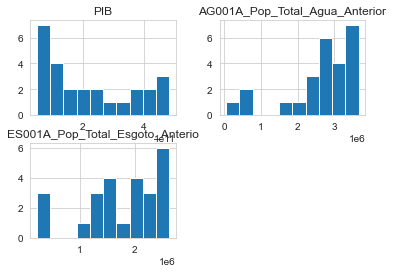

In [18]:
cols_with_missing = ['PIB', 'AG001A_Pop_Total_Agua_Anterior', 'ES001A_Pop_Total_Esgoto_Anterio']
df[cols_with_missing].hist()

I won't impute values for the NaN.  

Duas variáveis são desnecessárias na análise, pois são os valores defasados de outras duas variáveis existentes. 

Os valores para o PIB Estadual de 1995-2001 podem ser encontrados aqui: https://arquivofee.rs.gov.br/indicadores/pib-rs/estadual/serie-historica/

Vou refazer a análise acima.

In [19]:
df = pd.read_csv('Dados_Agua_Esgoto_v2.csv', sep=';')

#retirar coluna obs
df = df.drop('obs', 1)

# PIB em milhões de reais
#df["PIB"] = 1000000*df["PIB"] se usar Dados_Agua_Esgoto_v1.csv

display(df)

df.info()

C:\Users\CRISTI~1\AppData\Local\Temp/ipykernel_13272/1944695640.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('obs', 1)


,Ano,Pop_Total,AG001_Pop_Total_Agua,AG001A_Pop_Total_Agua_Anterior,ES001_Pop_Total_Esgoto,ES001A_Pop_Total_Esgoto_Anterio,FN001_ROD_Total,FN002_ROD_Agua,FN003_ROD_Esgoto,FN023_Invest_Agua_Prestador,FN024_Invest_Esgoto_Prestador,PIB
0,1995,2106612,2073000,NaN,1152000,NaN,126956775,104080377,22876398,15051835,9351714,4.987935e+10
1,1996,2102857,2055296,2073000.0,1202065,1152000.0,161540160,132676821,28863339,16324754,12499107,5.880737e+10
2,1997,1878089,550075,1767795.0,226199,1201123.0,27684599,21678023,6006576,2764096,1958632,6.499131e+10
3,1998,2034283,52301,550075.0,290197,226199.0,27295557,20036996,7258562,69951,582364,6.767312e+10
4,1999,2052257,712063,52301.0,358113,290197.0,33637355,26591236,7046119,2361972,698287,7.401578e+10
5,2000,2356190,2281036,593064.0,1359013,262793.0,206602084,165573180,41028904,20490926,13381602,8.181471e+10
6,2001,2393755,2387120,2281036.0,1415927,1359013.0,201941667,161108358,40833309,14957343,19105796,9.231008e+10
7,2002,2543289,2496671,2387120.0,1508108,1415927.0,288511514,233776225,54886292,16427114,11849180,9.884721e+10
8,2003,2806858,2706409,2488871.0,1484746,1508108.0,349167293,275386220,70672699,23381283,13018441,1.193254e+11
9,2004,2873165,2779849,2706409.0,1543203,1484746.0,388060102,307608100,78428932,27794623,10823603,1.311922e+11


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ano                              26 non-null     int64  
 1   Pop_Total                        26 non-null     int64  
 2   AG001_Pop_Total_Agua             26 non-null     int64  
 3   AG001A_Pop_Total_Agua_Anterior   25 non-null     float64
 4   ES001_Pop_Total_Esgoto           26 non-null     int64  
 5   ES001A_Pop_Total_Esgoto_Anterio  25 non-null     float64
 6   FN001_ROD_Total                  26 non-null     int64  
 7   FN002_ROD_Agua                   26 non-null     int64  
 8   FN003_ROD_Esgoto                 26 non-null     int64  
 9   FN023_Invest_Agua_Prestador      26 non-null     int64  
 10  FN024_Invest_Esgoto_Prestador    26 non-null     int64  
 11  PIB                              26 non-null     float64
dtypes: float64(3), int64(9)


# 5. EDA: Data explained by descriptive statistics

Exploratory Data Analysis (EDA) is an approach to data analysis for summarizing and visualizing the important characteristics of the data. EDA can be considered as a free assumption, normally carried in the data analytics behavior. It is also known as visual analytics or descriptive statistics. It is the practice of observing, and exploring data, before you emphasizing some hypotheses, fitting predictors, and other more intention to the inferential statistics. It typically includes the computation of simple summary statistics that capture some property of interest in the data and visualization.

We are looking to understand what variables you have, how many records the data set contains, how many missing values, what is the variable structure, what are the variable relationships, and more. In this section we perform a basic EDA.

   * How to explore: with summary-statistics, or visually?
   * How many variables analyzed simultaneously: univariate, bivariate, or multivariate?
   * What type of variable: categorical or continuous?


##### 5.1 Describing the data

In [20]:
df.describe()

,Ano,Pop_Total,AG001_Pop_Total_Agua,AG001A_Pop_Total_Agua_Anterior,ES001_Pop_Total_Esgoto,ES001A_Pop_Total_Esgoto_Anterio,FN001_ROD_Total,FN002_ROD_Agua,FN003_ROD_Esgoto,FN023_Invest_Agua_Prestador,FN024_Invest_Esgoto_Prestador,PIB
count,26.000000,2.600000e+01,2.600000e+01,2.500000e+01,2.600000e+01,2.500000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01
mean,2007.500000,3.232293e+06,2.724379e+06,2.652649e+06,1.816141e+06,1.743058e+06,6.024915e+08,4.615333e+08,1.388586e+08,4.797481e+07,5.353310e+07,2.232081e+11
std,7.648529,8.899529e+05,9.748729e+05,9.833820e+05,7.440697e+05,7.133759e+05,4.417264e+08,3.309329e+08,1.102429e+08,3.733934e+07,6.070364e+07,1.472559e+11
min,1995.000000,1.878089e+06,5.230100e+04,5.230100e+04,2.261990e+05,2.261990e+05,2.729556e+07,2.003700e+07,6.006576e+06,6.995100e+04,5.823640e+05,4.987935e+10
25%,2001.250000,2.431138e+06,2.414508e+06,2.387120e+06,1.433132e+06,1.415927e+06,2.270794e+08,1.826239e+08,4.449325e+07,1.744307e+07,1.201166e+07,9.394436e+10
50%,2007.500000,2.986102e+06,2.905994e+06,2.893961e+06,1.909710e+06,1.906791e+06,4.876685e+08,3.768555e+08,1.094895e+08,4.226380e+07,3.595142e+07,1.791198e+11
75%,2013.750000,4.166099e+06,3.477386e+06,3.400819e+06,2.502885e+06,2.364594e+06,9.510260e+08,7.304990e+08,2.175139e+08,7.168117e+07,6.689801e+07,3.514355e+11
max,2020.000000,4.442352e+06,3.686959e+06,3.656586e+06,2.701255e+06,2.620735e+06,1.384855e+09,1.052076e+09,3.378206e+08,1.533280e+08,2.155924e+08,4.824642e+11


In [24]:
# similar no R
%%R -i df 

library(tidyverse)
#quan <- df %>%
#select_if(is.numeric)                              # select only numeric columns
#names(quan)                                        # check the names of Quantitave variables

UsageError: Line magic function `%%R` not found.


In [25]:
%%R -i df

#summary(quan)                                      # basic summary statistics in one function  

NULL


##### 5.2 EDA: Analyzing all variables (except the lagged ones) over time

Creating san_df dataframe from all columns except the lagged ones

In [26]:
san_df = df.drop(['AG001A_Pop_Total_Agua_Anterior', 'ES001A_Pop_Total_Esgoto_Anterio'], 1)
san_df
san_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Ano                            26 non-null     int64  
 1   Pop_Total                      26 non-null     int64  
 2   AG001_Pop_Total_Agua           26 non-null     int64  
 3   ES001_Pop_Total_Esgoto         26 non-null     int64  
 4   FN001_ROD_Total                26 non-null     int64  
 5   FN002_ROD_Agua                 26 non-null     int64  
 6   FN003_ROD_Esgoto               26 non-null     int64  
 7   FN023_Invest_Agua_Prestador    26 non-null     int64  
 8   FN024_Invest_Esgoto_Prestador  26 non-null     int64  
 9   PIB                            26 non-null     float64
dtypes: float64(1), int64(9)
memory usage: 2.2 KB


C:\Users\CRISTI~1\AppData\Local\Temp/ipykernel_13272/3781316719.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  san_df = df.drop(['AG001A_Pop_Total_Agua_Anterior', 'ES001A_Pop_Total_Esgoto_Anterio'], 1)


In [27]:
san2_df = df.drop(['AG001A_Pop_Total_Agua_Anterior', 'ES001A_Pop_Total_Esgoto_Anterio', 'PIB'], 1)
san2_df

C:\Users\CRISTI~1\AppData\Local\Temp/ipykernel_13272/134096600.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  san2_df = df.drop(['AG001A_Pop_Total_Agua_Anterior', 'ES001A_Pop_Total_Esgoto_Anterio', 'PIB'], 1)


,Ano,Pop_Total,AG001_Pop_Total_Agua,ES001_Pop_Total_Esgoto,FN001_ROD_Total,FN002_ROD_Agua,FN003_ROD_Esgoto,FN023_Invest_Agua_Prestador,FN024_Invest_Esgoto_Prestador
0,1995,2106612,2073000,1152000,126956775,104080377,22876398,15051835,9351714
1,1996,2102857,2055296,1202065,161540160,132676821,28863339,16324754,12499107
2,1997,1878089,550075,226199,27684599,21678023,6006576,2764096,1958632
3,1998,2034283,52301,290197,27295557,20036996,7258562,69951,582364
4,1999,2052257,712063,358113,33637355,26591236,7046119,2361972,698287
5,2000,2356190,2281036,1359013,206602084,165573180,41028904,20490926,13381602
6,2001,2393755,2387120,1415927,201941667,161108358,40833309,14957343,19105796
7,2002,2543289,2496671,1508108,288511514,233776225,54886292,16427114,11849180
8,2003,2806858,2706409,1484746,349167293,275386220,70672699,23381283,13018441
9,2004,2873165,2779849,1543203,388060102,307608100,78428932,27794623,10823603


##### 5.3 Plotting and interpretating the results of time series analysis

import of rcparams from pyplot

__Lineplot of mean percentage of total unemployment and youth unemployment over the examined period__

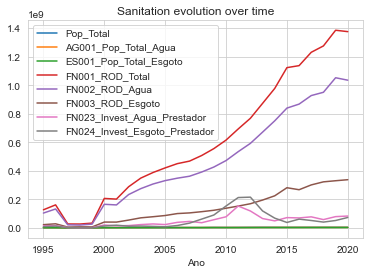

In [28]:
from pylab import rcParams
san2_df.plot(x='Ano', kind='line', title='Sanitation evolution over time')
rcParams['figure.figsize'] = 15, 4
plt.show()

**É necessário saber o que significa cada variável para fazer gráficos mais adequados (com quem comparar). Abaixo irei fazer separado para os de "Invest", "ROD" e "Pop_Total". É o que me parece adequado.**.

In [29]:
pop_df = san_df[['Pop_Total', 'AG001_Pop_Total_Agua', 'ES001_Pop_Total_Esgoto', 'Ano']]
pop_df

,Pop_Total,AG001_Pop_Total_Agua,ES001_Pop_Total_Esgoto,Ano
0,2106612,2073000,1152000,1995
1,2102857,2055296,1202065,1996
2,1878089,550075,226199,1997
3,2034283,52301,290197,1998
4,2052257,712063,358113,1999
5,2356190,2281036,1359013,2000
6,2393755,2387120,1415927,2001
7,2543289,2496671,1508108,2002
8,2806858,2706409,1484746,2003
9,2873165,2779849,1543203,2004


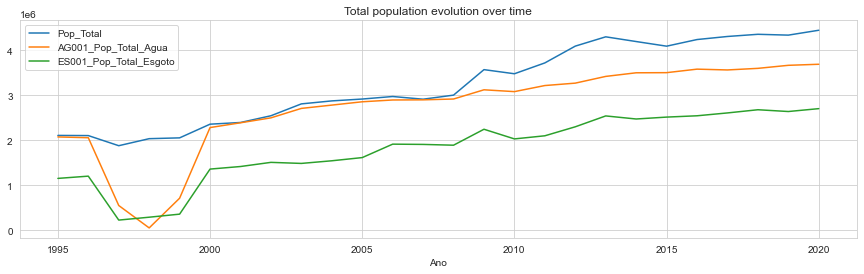

In [30]:
pop_df.plot(x='Ano',kind='line', title='Total population evolution over time')
rcParams['figure.figsize'] = 15, 4
plt.show()

**Houve uma queda "estranha" por volta de 1998. Estarão certos os valores na base de dados?**

In [31]:
rod_df = san_df[['FN001_ROD_Total', 'FN002_ROD_Agua', 'FN003_ROD_Esgoto', 'Ano']]
rod_df

,FN001_ROD_Total,FN002_ROD_Agua,FN003_ROD_Esgoto,Ano
0,126956775,104080377,22876398,1995
1,161540160,132676821,28863339,1996
2,27684599,21678023,6006576,1997
3,27295557,20036996,7258562,1998
4,33637355,26591236,7046119,1999
5,206602084,165573180,41028904,2000
6,201941667,161108358,40833309,2001
7,288511514,233776225,54886292,2002
8,349167293,275386220,70672699,2003
9,388060102,307608100,78428932,2004


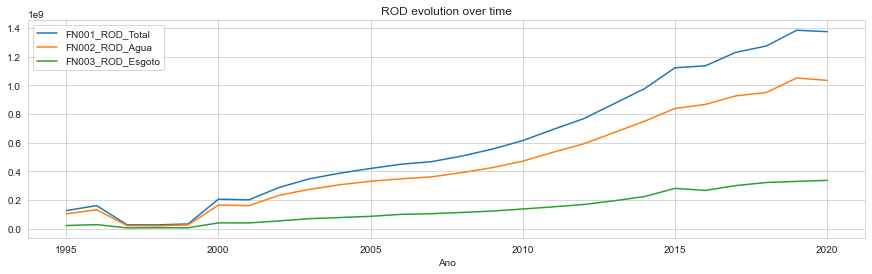

In [32]:
rod_df.plot(x='Ano', kind='line', title='ROD evolution over time')
rcParams['figure.figsize'] = 15, 4
plt.show()

In [33]:
invest_df = san_df[['FN023_Invest_Agua_Prestador', 'FN024_Invest_Esgoto_Prestador', 'Ano']]
invest_df

,FN023_Invest_Agua_Prestador,FN024_Invest_Esgoto_Prestador,Ano
0,15051835,9351714,1995
1,16324754,12499107,1996
2,2764096,1958632,1997
3,69951,582364,1998
4,2361972,698287,1999
5,20490926,13381602,2000
6,14957343,19105796,2001
7,16427114,11849180,2002
8,23381283,13018441,2003
9,27794623,10823603,2004


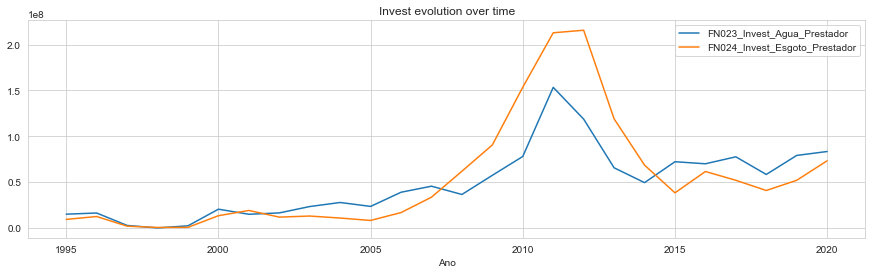

In [34]:
invest_df.plot(x='Ano', kind='line', title='Invest evolution over time')
rcParams['figure.figsize'] = 15, 4
plt.show()

**Invest é investimento? O valor foi maior por volta de 2011 e 2012 (primeiros dois anos do governo do T. Genro).**

__Interpretation__
- As séries são claramente correlacionadas.


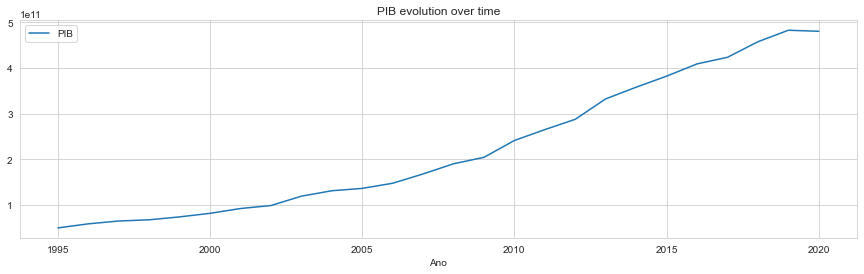

In [35]:
pib_df = san_df[['PIB', 'Ano']]

pib_df.plot(x='Ano', kind='line', title='PIB evolution over time')
rcParams['figure.figsize'] = 15, 4
plt.show()

__Scatterplot of Total population__

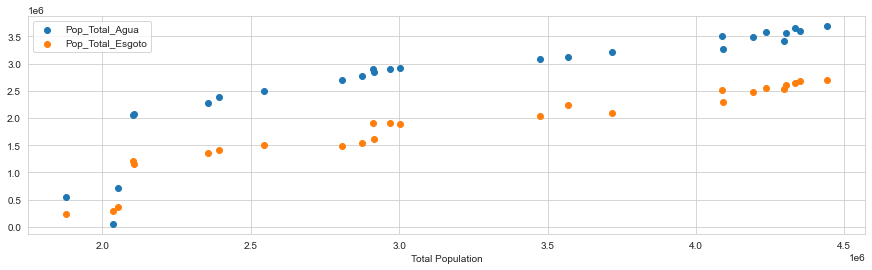

In [36]:
# create figure and axis objects with subplots()
fig,ax=plt.subplots()
ax.scatter(san_df['Pop_Total'], san_df['AG001_Pop_Total_Agua'], marker="o", label ='Pop_Total_Agua')
ax.scatter(san_df['Pop_Total'], san_df['ES001_Pop_Total_Esgoto'], marker="o", label = 'Pop_Total_Esgoto')
plt.legend(loc='upper left');
plt.xlabel("Total Population")
plt.show()





__Scatterplot of Invest__

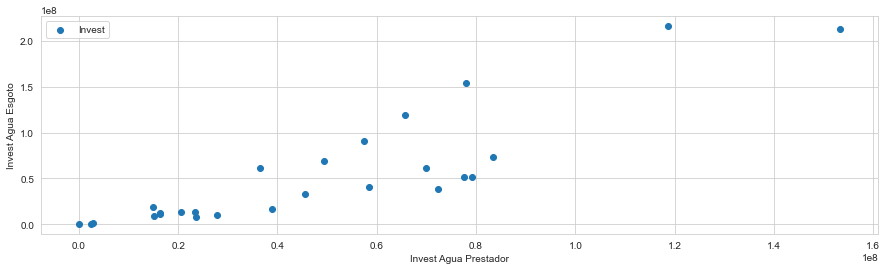

In [37]:
fig,ax=plt.subplots()
ax.scatter(san_df['FN023_Invest_Agua_Prestador'], san_df['FN024_Invest_Esgoto_Prestador'], marker="o", label ='Invest')
plt.legend(loc='upper left');
plt.xlabel("Invest Agua Prestador")
plt.ylabel("Invest Agua Esgoto")
plt.show()


__Scatterplot of ROD__

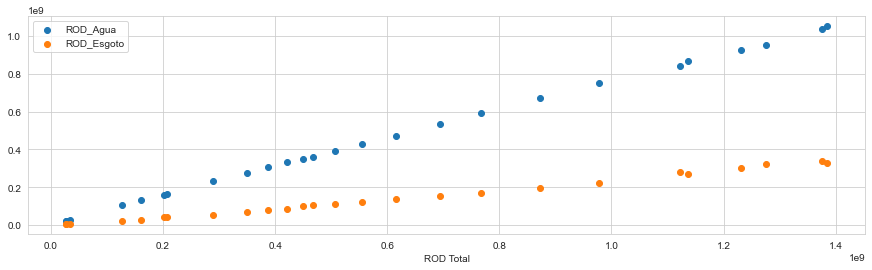

In [38]:
fig,ax=plt.subplots()
ax.scatter(san_df['FN001_ROD_Total'], san_df['FN002_ROD_Agua'], marker="o", label ='ROD_Agua')
ax.scatter(san_df['FN001_ROD_Total'], san_df['FN003_ROD_Esgoto'], marker="o", label = 'ROD_Esgoto')
plt.legend(loc='upper left');
plt.xlabel("ROD Total")
plt.show()

__Interpretation__
- There is a fairly strong positive correlation between the series above
- a derivada de ROD Esgoto é menor do que ROD Água

__Boxplots__

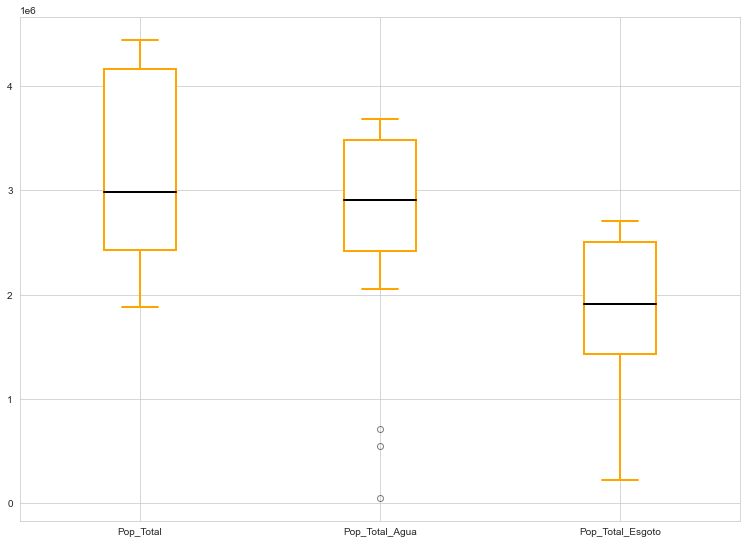

In [39]:
# Import libraries
#import matplotlib.pyplot as plt
#import numpy as np
 
data_pop = [san_df['Pop_Total'], san_df['AG001_Pop_Total_Agua'],san_df['ES001_Pop_Total_Esgoto']]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
## add patch_artist=True option to ax.boxplot() 
## to get fill color
# Creating plot
bp = ax.boxplot(data_pop, patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='orange', linewidth=2)
    # change fill color
    box.set( facecolor = 'white' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='orange', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='orange', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='black', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
    
## Custom x-axis labels
ax.set_xticklabels(['Pop_Total', 'Pop_Total_Agua', 'Pop_Total_Esgoto'])


# show plot
plt.show()

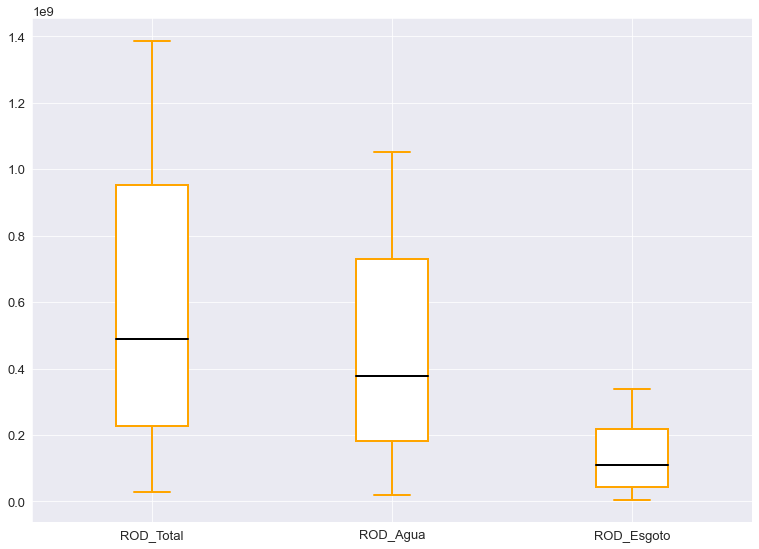

In [80]:
data_rod = [san_df['FN001_ROD_Total'], san_df['FN002_ROD_Agua'],san_df['FN003_ROD_Esgoto']]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
## add patch_artist=True option to ax.boxplot() 
## to get fill color
# Creating plot
bp = ax.boxplot(data_rod, patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='orange', linewidth=2)
    # change fill color
    box.set( facecolor = 'white' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='orange', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='orange', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='black', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
    
## Custom x-axis labels
ax.set_xticklabels(['ROD_Total', 'ROD_Agua', 'ROD_Esgoto'])


# show plot
plt.show()

* Esgoto foi bem menos variável no período (se mede pelo tamanho do box).

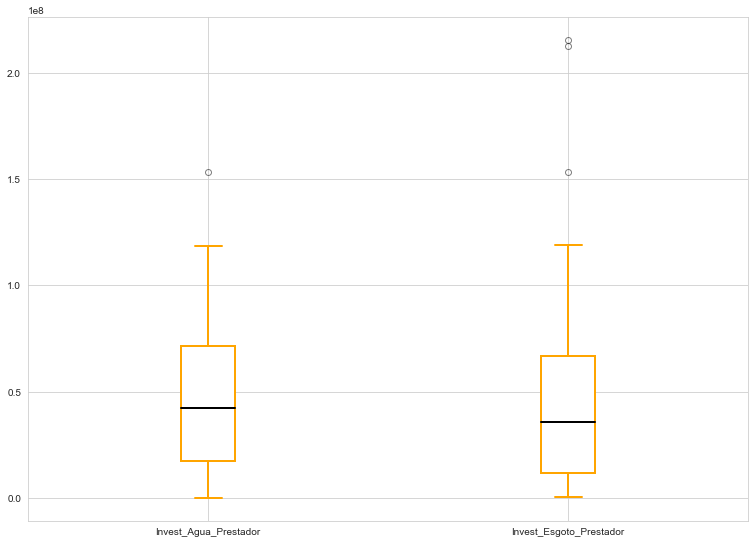

In [40]:
data_invest = [san_df['FN023_Invest_Agua_Prestador'], san_df['FN024_Invest_Esgoto_Prestador']]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
## add patch_artist=True option to ax.boxplot() 
## to get fill color
# Creating plot
bp = ax.boxplot(data_invest, patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='orange', linewidth=2)
    # change fill color
    box.set( facecolor = 'white' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='orange', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='orange', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='black', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
    
## Custom x-axis labels
ax.set_xticklabels(['Invest_Agua_Prestador', 'Invest_Esgoto_Prestador'])


# show plot
plt.show()

##### 5.4 Scatterplot Matrix 

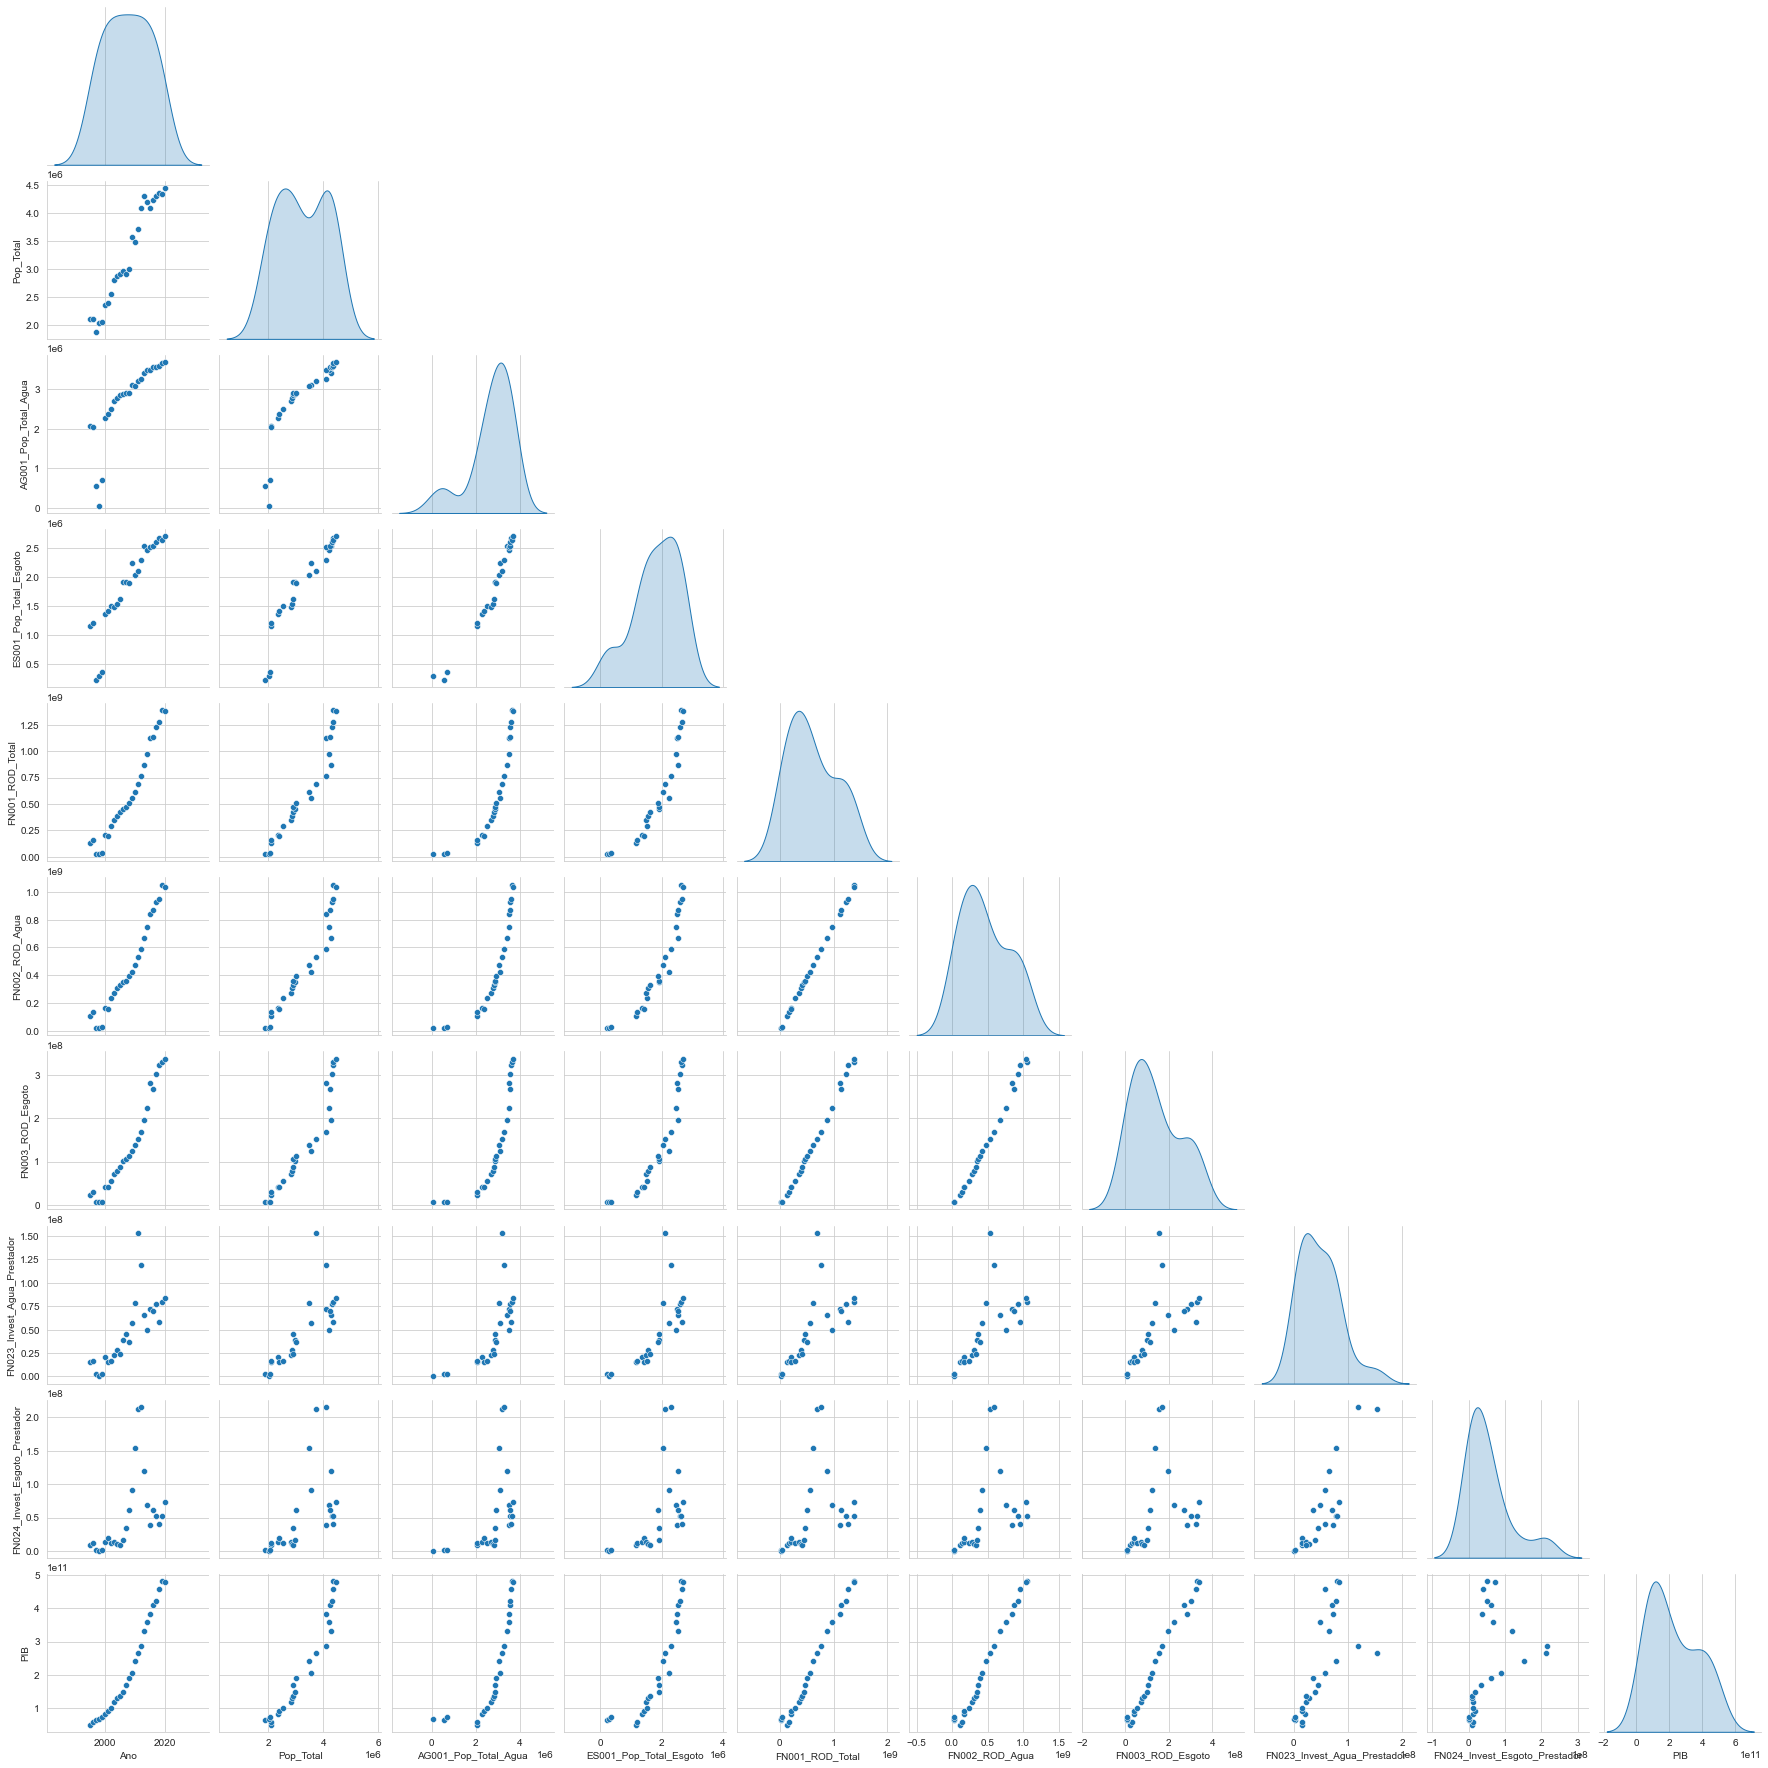

In [41]:
sns.pairplot(san_df, diag_kind="kde", corner=True)

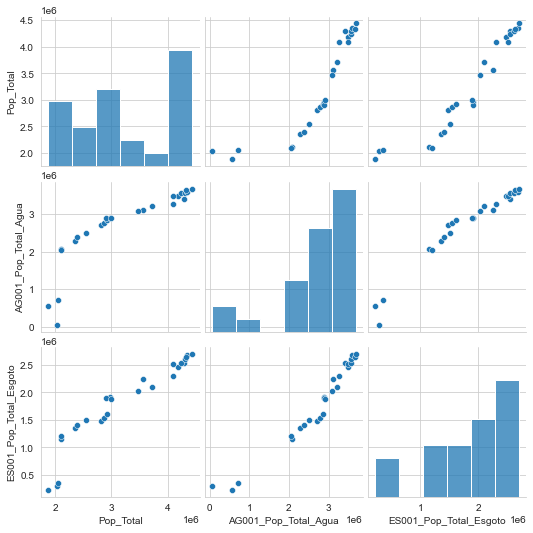

In [42]:
#If you prefer a smaller plot, use less variables. For instance, if you only want Pop Total,
#Pop Total Agua and Pop Total Esgoto

g = sns.pairplot(san_df, vars=['Pop_Total', 'AG001_Pop_Total_Agua', 'ES001_Pop_Total_Esgoto'])


# or g = sns.pairplot(san_df, xvars=['Pop_Total', 'AG001_Pop_Total_Agua', 'ES001_Pop_Total_Esgoto'],\
#                             yvars= ['Ano', 'PIB'])
# diferentes x e y

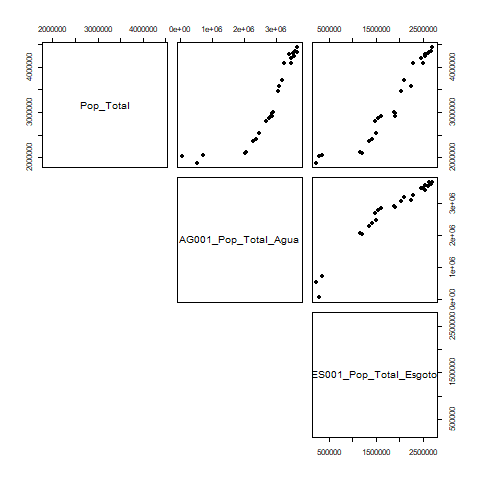

In [43]:
%%R -i san_df

pairs(san_df[,2:4], pch = 19, lower.panel = NULL)

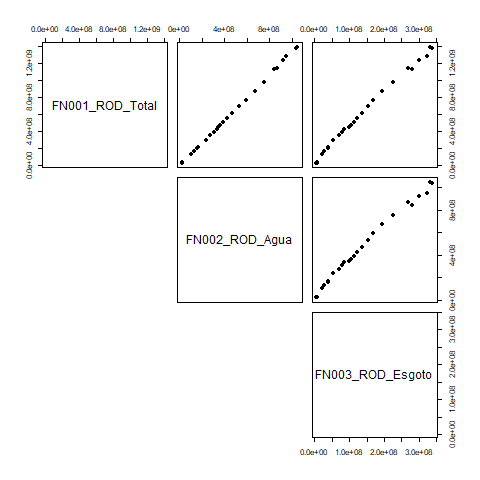

In [44]:
%%R -i san_df

pairs(san_df[,5:7], pch = 19, lower.panel = NULL)

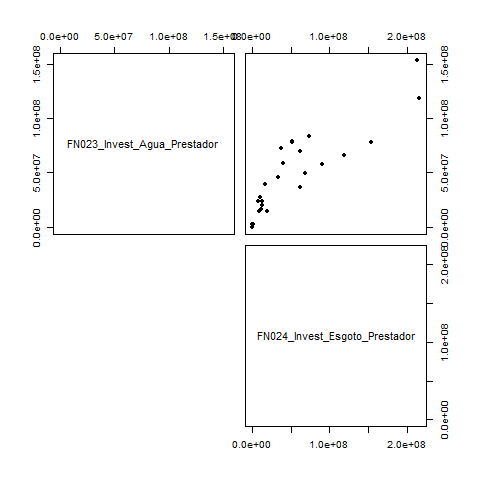

In [45]:
%%R -i san_df

pairs(san_df[,8:9], pch = 19, lower.panel = NULL)

* Visualmente podemos ver que a associação/correlação neste banco de dados é forte.

##### 5.5 Correlation Matrix

In [46]:
san_corr = san_df.corr()

display(san_corr)



,Ano,Pop_Total,AG001_Pop_Total_Agua,ES001_Pop_Total_Esgoto,FN001_ROD_Total,FN002_ROD_Agua,FN003_ROD_Esgoto,FN023_Invest_Agua_Prestador,FN024_Invest_Esgoto_Prestador,PIB
Ano,1.000000,0.977511,0.830031,0.917150,0.974560,0.975304,0.967095,0.753730,0.505923,0.974485
Pop_Total,0.977511,1.000000,0.859111,0.941020,0.960891,0.963361,0.946409,0.789297,0.580460,0.958637
AG001_Pop_Total_Agua,0.830031,0.859111,1.000000,0.969302,0.823674,0.831160,0.794923,0.698630,0.481933,0.767005
ES001_Pop_Total_Esgoto,0.917150,0.941020,0.969302,1.000000,0.909355,0.914245,0.888510,0.741539,0.518565,0.872967
FN001_ROD_Total,0.974560,0.960891,0.823674,0.909355,1.000000,0.999800,0.997628,0.701131,0.406165,0.992051
FN002_ROD_Agua,0.975304,0.963361,0.831160,0.914245,0.999800,1.000000,0.996089,0.705290,0.412599,0.990895
FN003_ROD_Esgoto,0.967095,0.946409,0.794923,0.888510,0.997628,0.996089,1.000000,0.677423,0.372100,0.992249
FN023_Invest_Agua_Prestador,0.753730,0.789297,0.698630,0.741539,0.701131,0.705290,0.677423,1.000000,0.880344,0.706282
FN024_Invest_Esgoto_Prestador,0.505923,0.580460,0.481933,0.518565,0.406165,0.412599,0.372100,0.880344,1.000000,0.436653
PIB,0.974485,0.958637,0.767005,0.872967,0.992051,0.990895,0.992249,0.706282,0.436653,1.000000


In [49]:
#corr.style.background_gradient(cmap='coolwarm')


NameError: name 'corr' is not defined

* Using Seaborn heatmap

<AxesSubplot:>

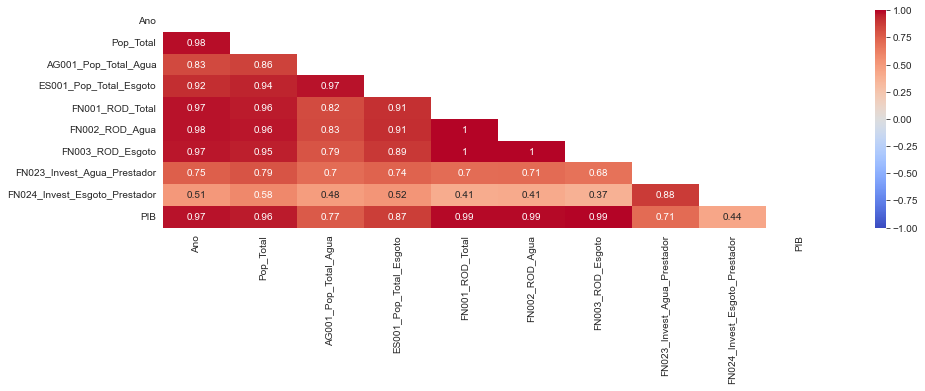

In [50]:
df_corr = matrix = np.triu(san_df.corr())
sns.heatmap(san_df.corr(), annot=True, mask=matrix, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

### Obs relevante: A correlação medida acima é a de Pearson. Esta métrica só é adequada para medir uma associação linear entre as variáveis. Como possibilidade poderíamos utilizar os coeficientes de correlação de postos (não-paramétricos) de Spearman ou Kendall's tau. Citei na próxima sessão.

# 6. Inferential statistics

### (Some possible) Nonparametric tests

Three sorts of nonparametric test are available here: for a difference between groups, for randomness, and for (rank) correlation. 

#### Difference tests

We can carry out a nonparametric test for a difference between two populations or groups. 

• Sign test: This test is based on the fact that if two samples, x and y, are drawn randomly from the same distribution, the probability that xi > yi, for each observation i, should equal 0.5. The test statistic is w, the number of observations for which xi > yi. Under the null hypothesis this follows the Binomial distribution with parameters (n, 0.5), where n is the number of observations. 

• Wilcoxon rank-sum test. This test proceeds by ranking the observations from both samples jointly, from smallest to largest, then finding the sum of the ranks of the observations from one of the samples. The two samples do not have to be of the same size, and if they differ the smaller sample is used in calculating the rank-sum. Under the null hypothesis that the samples are drawn from populations with the same median, the probability distribution of the rank-sum can be computed for any given sample sizes; and for reasonably large samples a close Normal approximation exists. 

• Wilcoxon signed-rank test. This is designed for matched data pairs such as, for example, the values of a variable for a sample of individuals before and after some treatment. The test proceeds by finding the differences between the paired observations, xi – yi, ranking these differences by absolute value, then assigning to each pair a signed rank, the sign agreeing with the sign of the difference. One then calculates W+, the sum of the positive signed ranks. As with the rank-sum test, this statistic has a well-defined distribution under the null that the median difference is zero, which converges to the Normal for samples of reasonable size. 

### Obs: Não sei se é relevante, então não fiz. Precisamos entender melhor os indicadores.

#### Correlation 

 Spearman's rank correlation rho and Kendall's rank correlation tau. 
 
 No Python use
 
#calculate spearman's correlation \
coef, p = spearmanr(data1, data2)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html

#calculate kendall's correlation \
coef, p = kendalltau(data1, data2)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html

onde p representa o p-value do teste (a nula é de que a correlação é igual a zero).

Acho que não há necessidade de fazer, mas só para exemplificar, eu vou testar com Rod_Esgoto e Invest_Esgoto (menor correlação linear encontrada = 0.37).


In [51]:
from scipy.stats import spearmanr

corr, p_value = spearmanr(san_df['FN003_ROD_Esgoto'], san_df['FN024_Invest_Esgoto_Prestador'])

print(corr)
print(p_value)

0.7593162393162393
6.8678491513747475e-06


In [52]:
from scipy.stats import kendalltau

tau, p_tau = kendalltau(san_df['FN003_ROD_Esgoto'], san_df['FN024_Invest_Esgoto_Prestador'])

print(tau)
print(p_tau)

0.5384615384615385
5.7525846742063396e-05


* Note que os p-values são quase zero.

#### Obs: Não devemos/podemos fazer testes paramétricos com este tamanho de amostra.

# 7. Autocorrelation

##### 7.1 Time Series Plots

In [53]:
l_san_df = np.log(san_df)
l_san_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Ano                            26 non-null     float64
 1   Pop_Total                      26 non-null     float64
 2   AG001_Pop_Total_Agua           26 non-null     float64
 3   ES001_Pop_Total_Esgoto         26 non-null     float64
 4   FN001_ROD_Total                26 non-null     float64
 5   FN002_ROD_Agua                 26 non-null     float64
 6   FN003_ROD_Esgoto               26 non-null     float64
 7   FN023_Invest_Agua_Prestador    26 non-null     float64
 8   FN024_Invest_Esgoto_Prestador  26 non-null     float64
 9   PIB                            26 non-null     float64
dtypes: float64(10)
memory usage: 2.2 KB


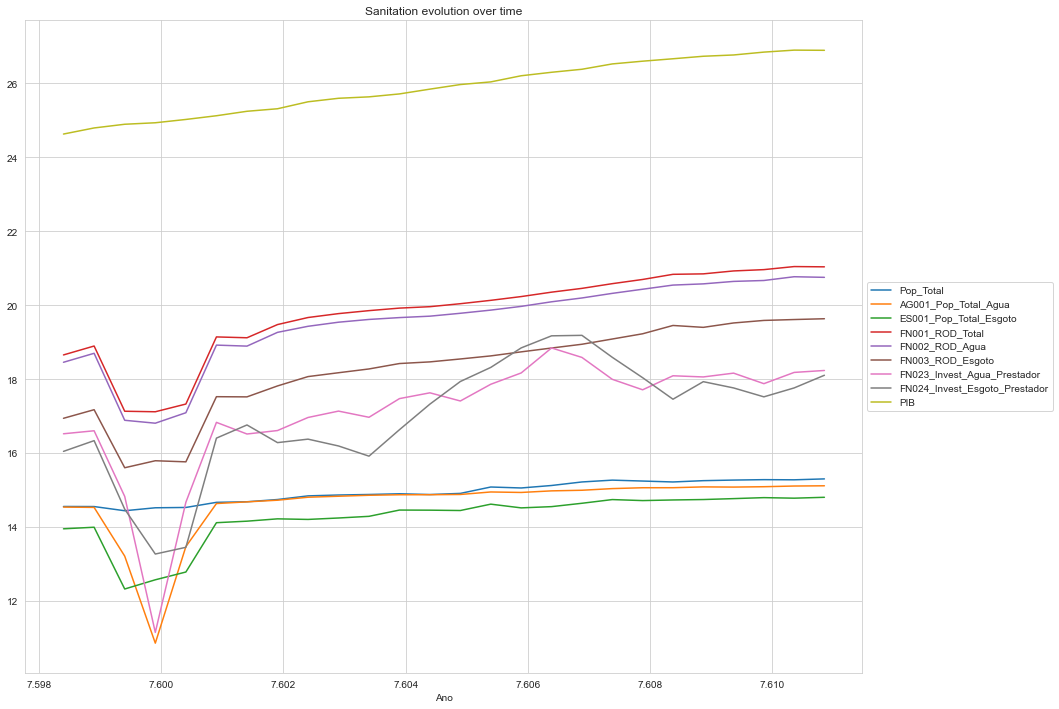

In [54]:
l_san_df.plot(x='Ano', kind='line', title='Sanitation evolution over time')
rcParams['figure.figsize'] = 15, 4

ax = plt.subplot(111)

# Increase height by 200%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height*3])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

### Todas as variáveis acima estão em log. Não troquei o nome.

### Note que muitas parecem cointegrar.

#### 7.1.1 STL Decomposition (Seasonal, Trend and Loess)

In [55]:
# import required packages, prepare the graphics environment, and prepare the data.

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
sns.set_style("darkgrid")

plt.rc("figure", figsize=(16, 12))
plt.rc("font", size=13)



In [56]:
# Não é a maneira correta de fazer - copiar todos os valores e colocar vírgulas. Aprendendo como fazer.

pop_total =[
2106612,
2102857,
1878089,
2034283,
2052257,
2356190,
2393755,
2543289,
2806858,
2873165,
2914602,
2970783,
2910820,
3001422,
3567442,
3475969,
3716796,
4089840,
4296198,
4191519,
4088608,
4235815,
4303887,
4352348,
4333851,
4442352
]

pop_total = pd.Series(
   pop_total, index=pd.date_range("1995", periods=len(pop_total), freq="Y"), name="Pop"
)
pop_total.describe()


count    2.600000e+01
mean     3.232293e+06
std      8.899529e+05
min      1.878089e+06
25%      2.431138e+06
50%      2.986102e+06
75%      4.166099e+06
max      4.442352e+06
Name: Pop, dtype: float64

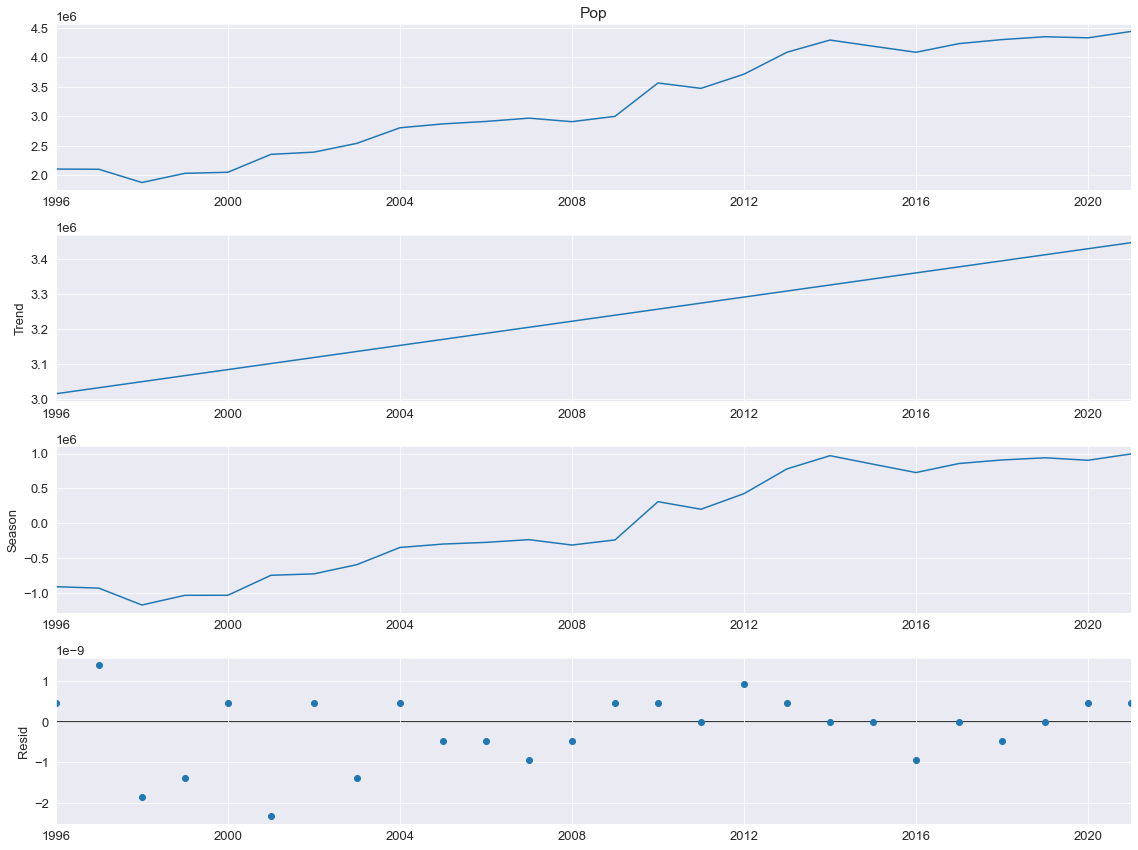

In [79]:
from statsmodels.tsa.seasonal import STL

stl = STL(pop_total, seasonal=5, period = 25)
res = stl.fit()
fig = res.plot()

# seasonal: Length of the seasonal smoother. Must be an odd integer, and should normally be >= 7 (default).

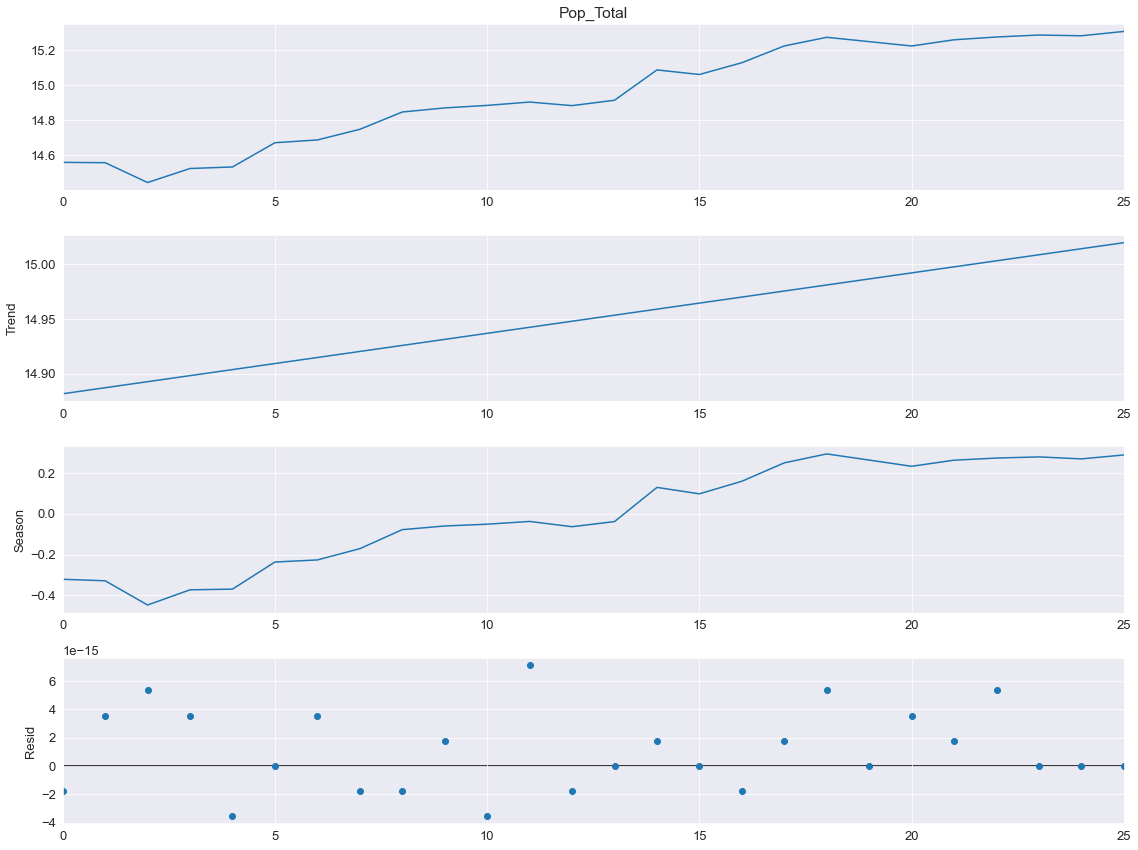

In [58]:
stl = STL(l_san_df["Pop_Total"], seasonal=7, period = 25)
res = stl.fit()
fig = res.plot()

#### População Total tem uma tendência forte.

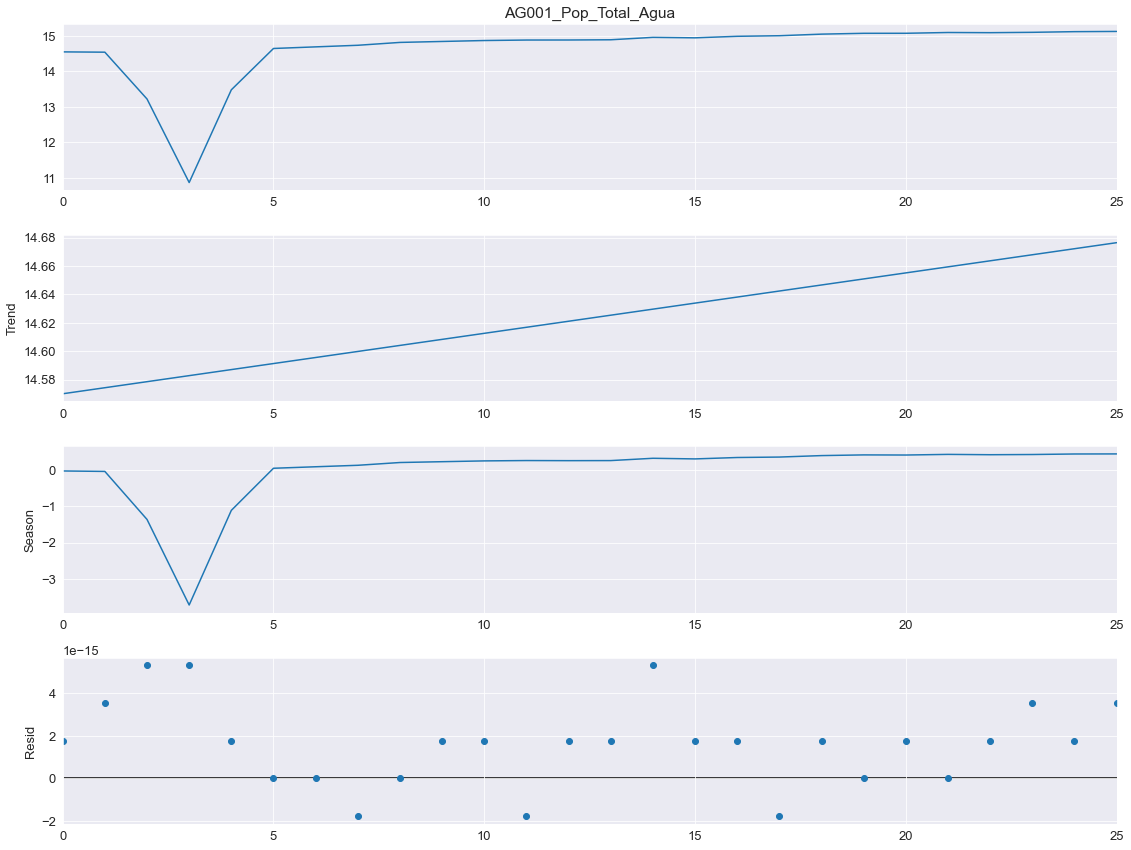

In [59]:
stl = STL(l_san_df["AG001_Pop_Total_Agua"], seasonal=7, period = 25)
res = stl.fit()
fig = res.plot()

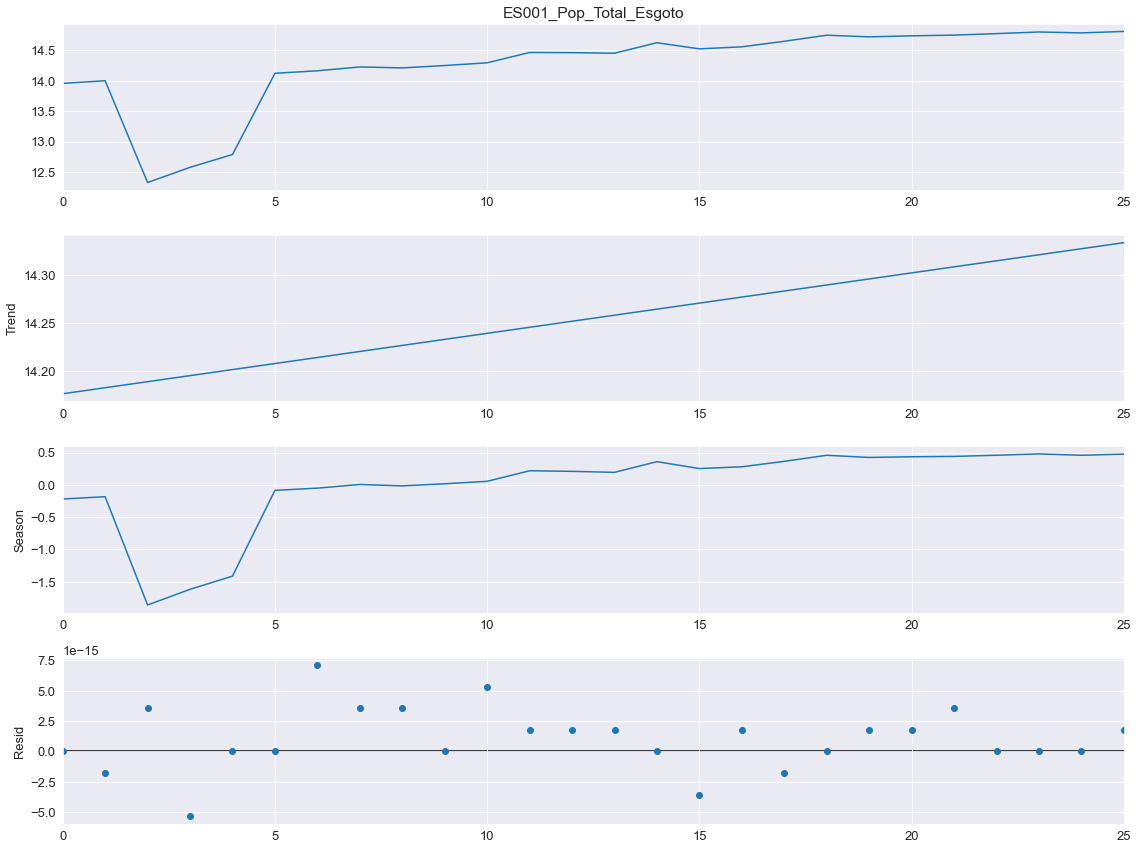

In [60]:
stl = STL(l_san_df["ES001_Pop_Total_Esgoto"], seasonal=7, period = 25)
res = stl.fit()
fig = res.plot()

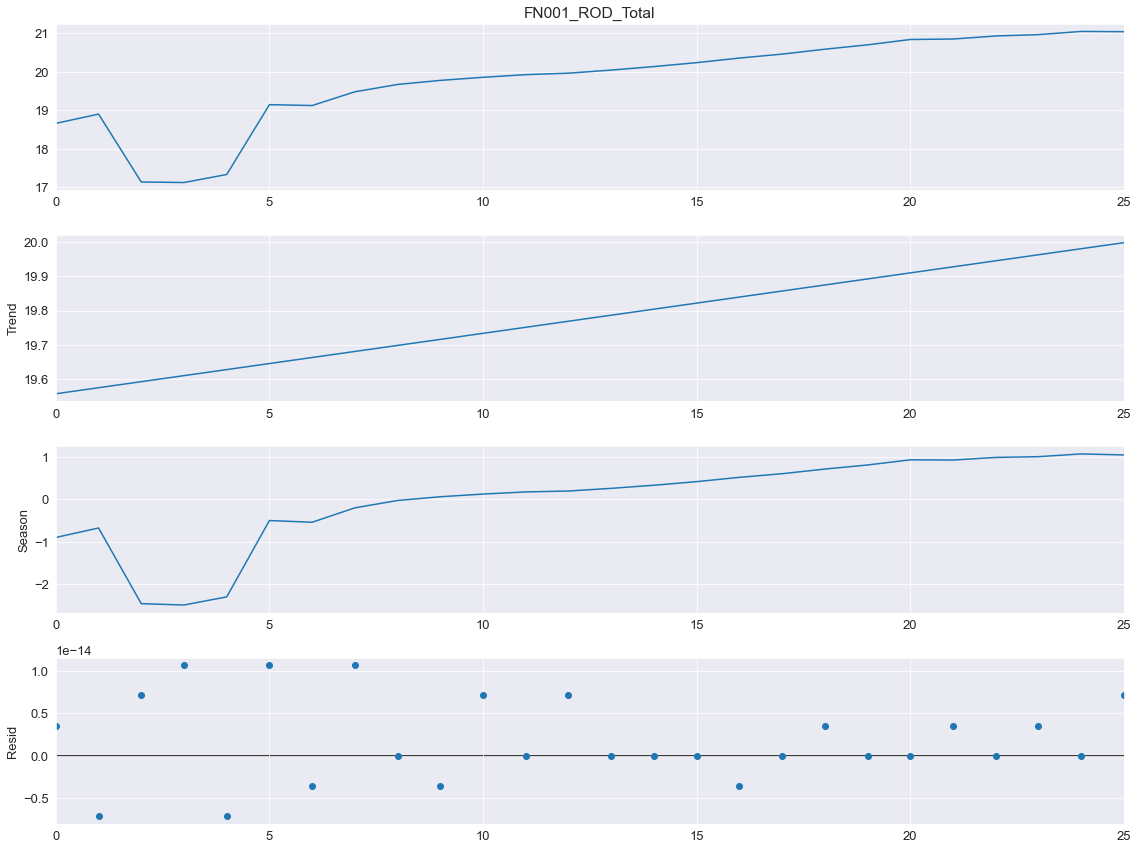

In [61]:
stl = STL(l_san_df["FN001_ROD_Total"], seasonal=7, period = 25)
res = stl.fit()
fig = res.plot()

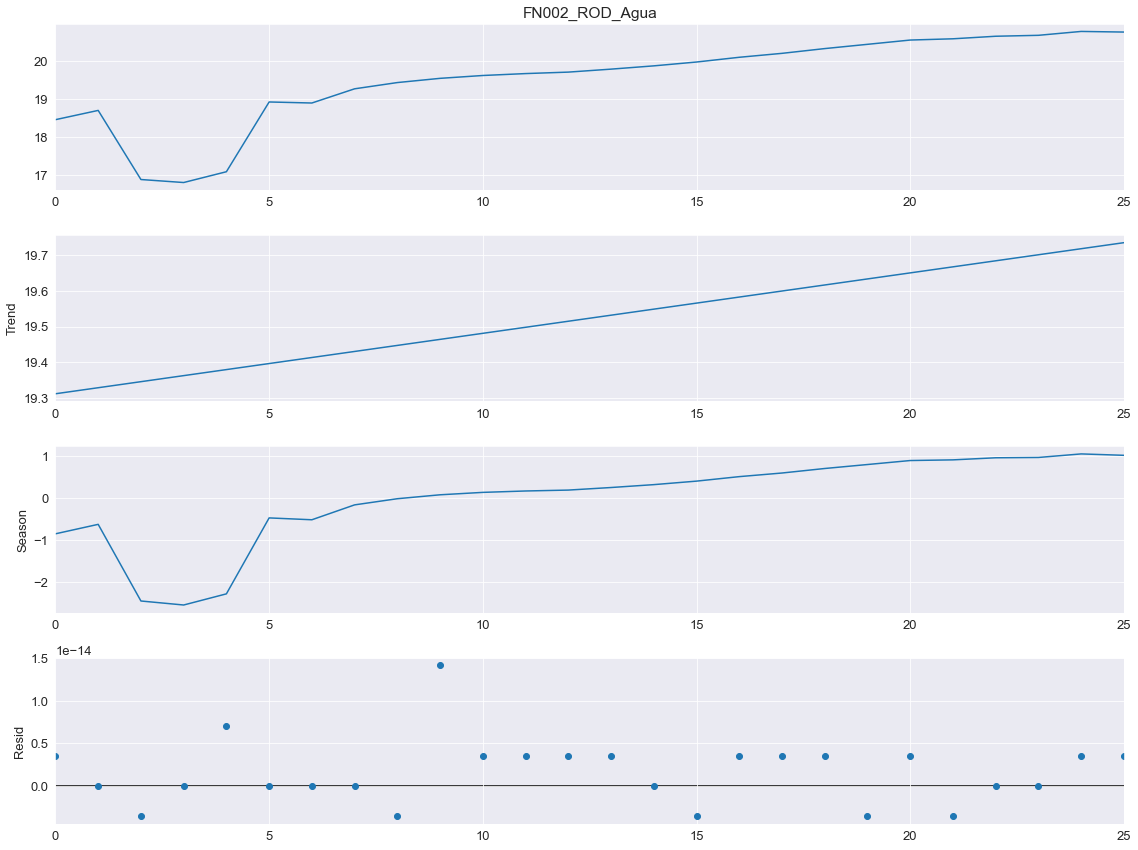

In [62]:
stl = STL(l_san_df["FN002_ROD_Agua"], seasonal=7, period = 25)
res = stl.fit()
fig = res.plot()

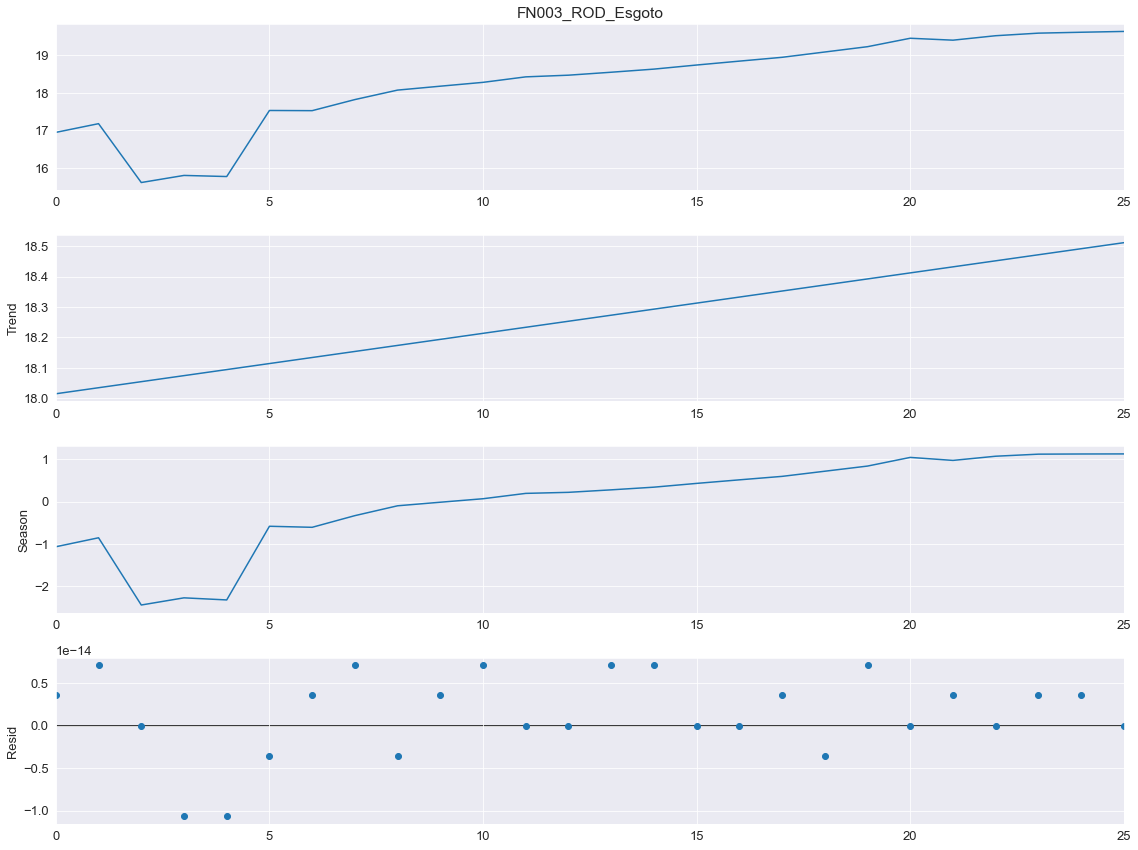

In [63]:
stl = STL(l_san_df["FN003_ROD_Esgoto"], seasonal=7, period = 25)
res = stl.fit()
fig = res.plot()

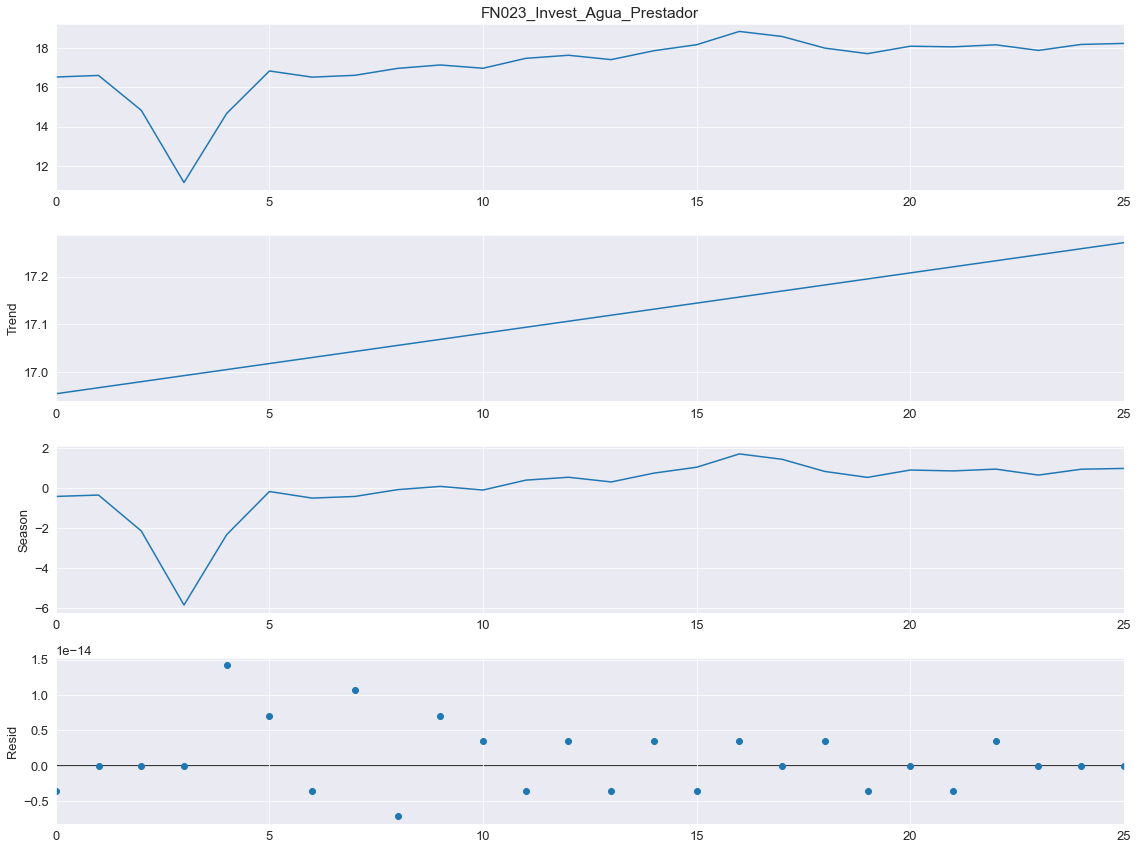

In [64]:
stl = STL(l_san_df["FN023_Invest_Agua_Prestador"], seasonal=7, period = 25)
res = stl.fit()
fig = res.plot()

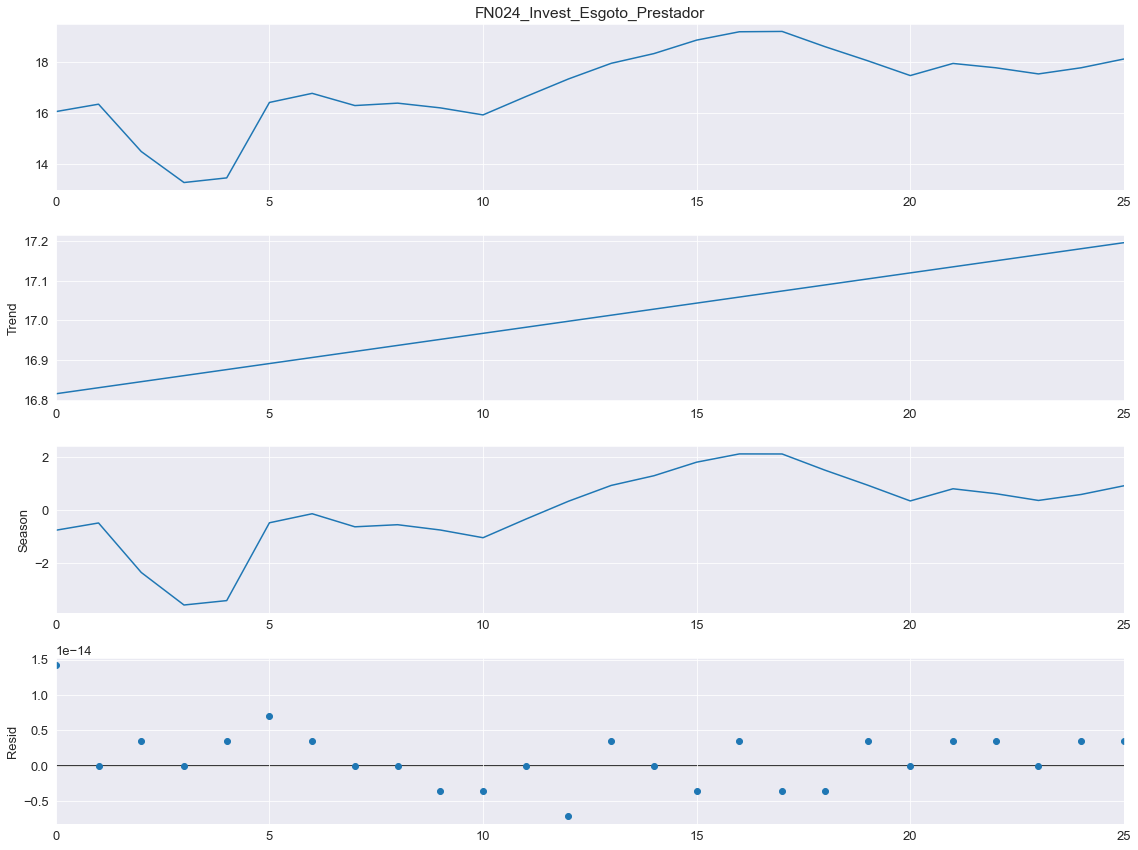

In [65]:
stl = STL(l_san_df["FN024_Invest_Esgoto_Prestador"], seasonal=7, period = 25)
res = stl.fit()
fig = res.plot()

#### A série Invest_Esgoto_Prestador é a que eu consigo identificar mais padrões (parece ter algum padrão sazonal).

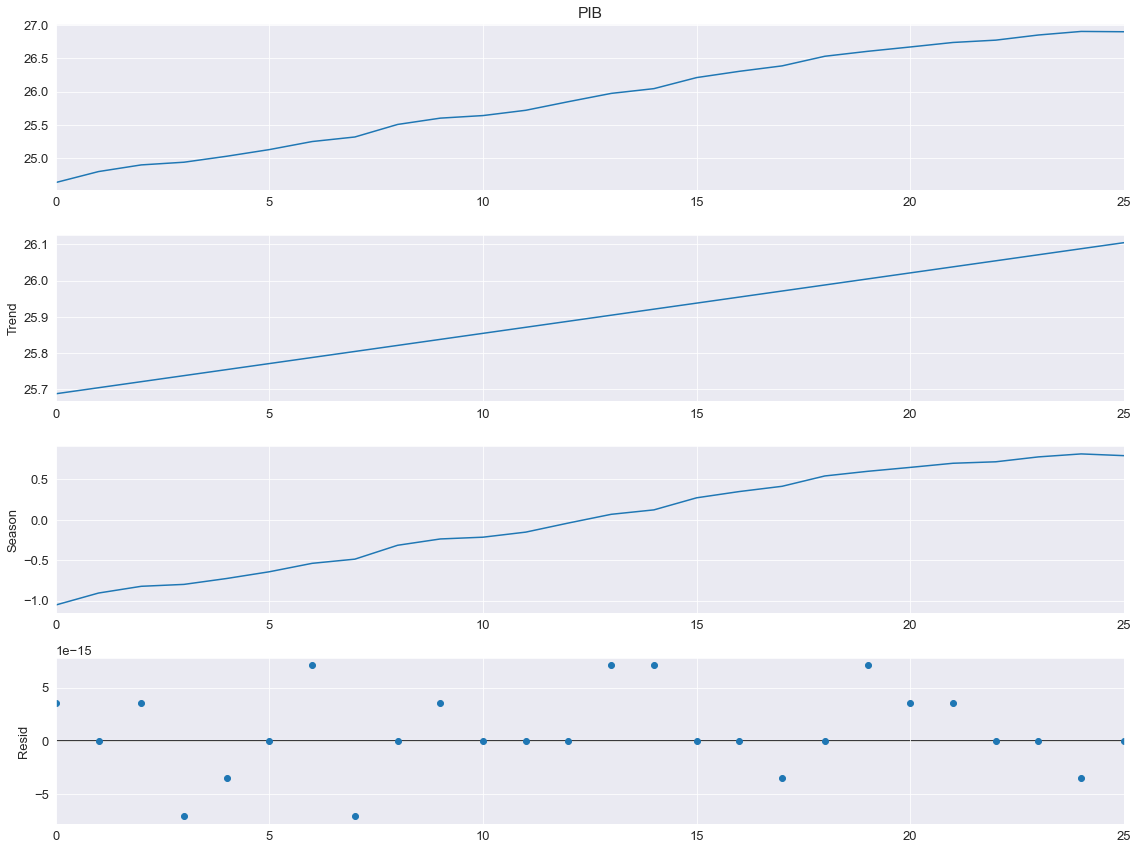

In [66]:
stl = STL(l_san_df["PIB"], seasonal=7, period = 25)
res = stl.fit()
fig = res.plot()

#### 7.1.2 Previsão com STL

Veja [aqui](https://www.statsmodels.org/stable/examples/notebooks/generated/stl_decomposition.html).

As séries diferenciadas parecem ser um ruído branco (quando olhamos o correlograma). Logo, o exemplo na página não é adequado.

* Por curiosidade, veja o gráfico da diferença dos logaritmos das séries.

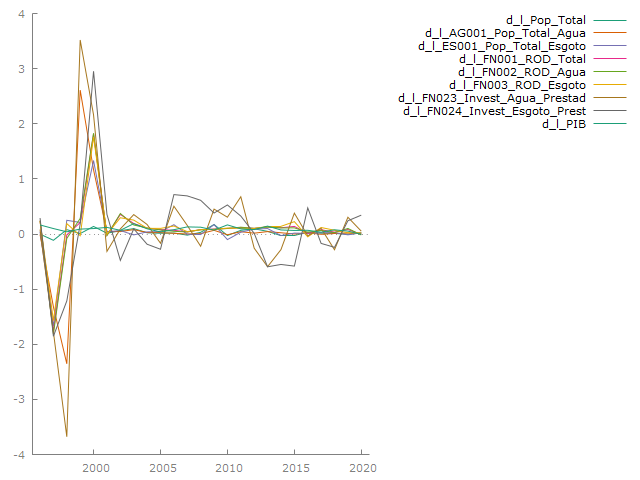

In [67]:
#Fiz no Gretl (é simples de fazer no Python)

from IPython.display import Image
Image("d_log_series.png")

##### 7.2 Correlogram

* As primeiras diferenças das séries são um ruído branco. A única exceção que cabe uma investigação é a série diferenciada do Invest_Esgoto_Prestador novamente, cujo primeiro lag da ACF e os dois primeiros da PACF são "barely" significativos. Utilizando a metodologia de Box and Jenkins o melhor modelo usando os tradicionais critérios de informação é um MA(2). Cabe ressaltar que a amostra não é grande o suficiente para encontrarmos uma regularidade que permita utilizar com confiança a metodologia. <br><br>

* Com a primeira diferença dos logs (série dos retornos) todas parecem um ruído branco.

In [68]:
# first diff

first_diff = san_df["FN024_Invest_Esgoto_Prestador"] - san_df["FN024_Invest_Esgoto_Prestador"].shift(1)
first_diff = first_diff.dropna(inplace = False)

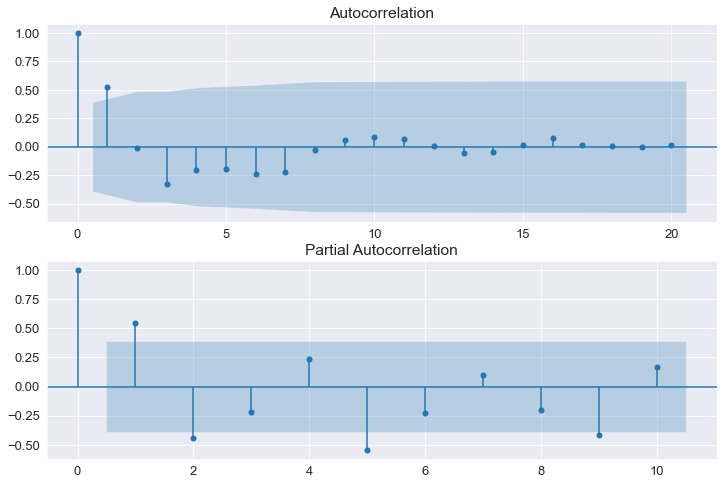

In [69]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(first_diff, lags=20, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(first_diff, lags=10, ax=ax2)# , lags=10

In [70]:
#https://docs.w3cub.com/statsmodels/generated/statsmodels.tsa.arima_model.arma.fit
model = sm.tsa.ARMA(first_diff, (0,2))
model_results = model.fit(trend='nc', method='mle')
model_results.summary()



C:\Users\Cristina Tessari\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Cristina Tessari\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will b

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    ARMA Model Results                                   
=========================================================================================
Dep. Variable:     FN024_Invest_Esgoto_Prestador   No. Observations:                   25
Model:                                ARMA(0, 2)   Log Likelihood                -459.166
Method:                                      mle   S.D. of innovations       21905095.542
Date:                           Thu, 17 Feb 2022   AIC                            924.331
Time:                                   15:00:42   BIC                            927.988
Sample:                                        0   HQIC                           925.345
                                                                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
ma.L1.FN024_Invest_Esgoto_Prestador     0.8927      0.131      6.839      0.000       0.637       1.149
ma.L2.FN024_Invest_Esgoto_Prestador     0.7942      0.233      3.414      0.001       0.338       1.250
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -0.5620           -0.9712j            1.1221           -0.3335
MA.2           -0.5620           +0.9712j            1.1221            0.3335
-----------------------------------------------------------------------------
"""

### 7.3 Dickey-Fuller tests

In [71]:
# Dickey-Fuller
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 12, cutoff = 0.01):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 5 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)

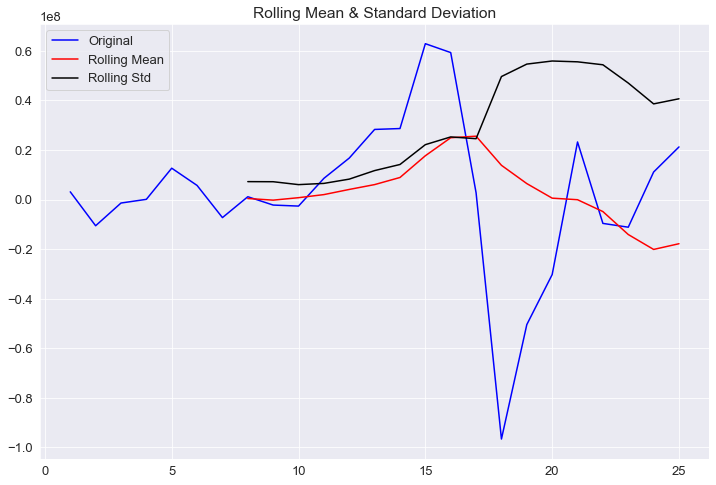

Results of Dickey-Fuller Test:
p-value = 0.0148. The series is likely non-stationary.
Test Statistic                 -3.302166
p-value                         0.014782
#Lags Used                      1.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64


In [72]:
test_stationarity(first_diff, window=8)

* No R eu sei mais opções. <br><br>

* No Gretl eu usei a opção sem constante para fazer o teste (de acordo com o gráfico da série me parece mais apropriado). O teste ADF acima utiliza a opção com constante. Descobri como fazer abaixo usando a função adfuller from statsmodels.
    - Sem constante o p-valor assintótico é de 0.0007927 (feito no Gretl), isto é, rejeitamos a nula de que a série não é estacionária.<br><br>
    
* Basicamente, todas estas séries são I(1), embora a confiança em uma afirmação como essa seja limitada pelo tamanho da amostra (alguns termos dificilmente desaparecem na parte matemática destes modelos com um T deste tamanho - é necessário que desapareçam para garantirmos a estacionariedade). 

In [73]:
#https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html
df = sm.tsa.stattools.adfuller(first_diff, maxlag=8, regression='nc', autolag='AIC', regresults=True)

#dickey-fuller stat
print('O valor da estatística de teste de Dickey-Fuller é {}.'.format(df[0]))
#p-value
print('O valor do p-value associado a estatística de teste de Dickey-Fuller é {}.'.format(df[1]))

O valor da estatística de teste de Dickey-Fuller é -3.349511332167865.
O valor do p-value associado a estatística de teste de Dickey-Fuller é 0.000824647450135803.


In [74]:
df_kpss = sm.tsa.stattools.kpss(first_diff, regression='c')

#KPSS stat
print('O valor da estatística de teste de KPSS é {}.'.format(df_kpss[0]))
#p-value
print('O valor do p-value associado a estatística de teste de KPSS é {}.'.format(df_kpss[1]))

O valor da estatística de teste de KPSS é 0.18212982628130056.
O valor do p-value associado a estatística de teste de KPSS é 0.1.


C:\Users\Cristina Tessari\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\Cristina Tessari\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


### A nula do teste KPSS é estacionariedade. Para o ADF a nula é que a série contém uma raiz unitária.

##### 7.3 Cross-Correlogram

* As variáveis parecem ser todas coincidentes (fiz os gráficos no Gretl).

In [75]:
#calculate cross correlation
cc = sm.tsa.stattools.ccf(san_df['FN023_Invest_Agua_Prestador'], san_df['FN024_Invest_Esgoto_Prestador'], adjusted=False)

In [76]:
sm.tsa.stattools.ccf(san_df['FN023_Invest_Agua_Prestador'], san_df['FN024_Invest_Esgoto_Prestador'], adjusted=False)

array([ 0.88034436,  0.72989201,  0.52084315,  0.4044769 ,  0.30935981,
        0.22802863,  0.17644576,  0.15369638,  0.1244343 ,  0.02918996,
       -0.08113583, -0.18029268, -0.25671656, -0.29986678, -0.31633272,
       -0.29345173, -0.26357488, -0.18795287, -0.13741602, -0.11968006,
       -0.12562822, -0.11015614, -0.09201497, -0.06285101, -0.04990466,
       -0.02759646])

In [77]:
#Interpretation
print('The cross correlation at lag 0 é {}.'.format(cc[0]))
#p-value
print('The cross correlation at lag 1 é {}.'.format(cc[1]))

The cross correlation at lag 0 é 0.8803443567938343.
The cross correlation at lag 1 é 0.729892005658941.


# 8. VAR/VECM

# 9. Panel analysis


# 10. Machine Learning Analysis

* Goal is to explain xxxx by independent variables of time-panel Dataframe df

##### 10.1 Using Train/Test Split on Dataframe 

In [ ]:
df.head(1)

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ""),
#                                                    df.Sentiment_indicators, test_size = 0.3)

##### 10.2 Defining models for linear Regression Sklearn
- Linear Regression
- Lasso Regression
- Ridge Regression
- ElasticNet

In [ ]:
def models_automation(models, X_train, y_train):
    for model in models:
        model.fit(X_train, y_train)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

linear_models = [LinearRegression(), Lasso(), Ridge(), ElasticNet()]
models_automation(linear_models, X_train, y_train)

##### 10.3 Using SVR Model, KNeighbors Regressor, DecisionTree Regressor, Gradient Booster, RandomForest Regressor, MLP Regressor

In [ ]:
svr = [SVR()]
models_automation(svr, X_train, y_train)

In [ ]:
knn = [KNeighborsRegressor()]
models_automation(knn, X_train, y_train)

In [ ]:
dtr = [DecisionTreeRegressor()]
models_automation(dtr, X_train, y_train)

In [ ]:
mlpr = [MLPRegressor(max_iter = 1000)]
models_automation(mlpr, X_train, y_train)

##### 10.4 Interpretation of results
- All regression results show a very high statistical significance of the regression model to explain xxxx rate by independent variables
- Model has a significance on a xxx% level

# 11. Conclusion of analysis

On a high aggegated level this analysis researched xxxx impacts of xxxx.
Used was constructed panel DataFrame over time-period from 1995 - 2020. 

Goal of this work was testing xxx different hypothesis xxxx different ways, eg on different levels of used tools to analyse and proof hypothesis. 

* EDA (only by visualisation)
* time series linear models
* machine learning algorithms

__Hypothesis 1:__

One major goal of this analysis was to explain how indicators are related to each other and how they got impacted due to xxxx.

__What would I do different if doing same analysis again?__
- I would take a look fore different indicators. This time I used only indicators from xxx indicators of xxx. The choice of yearly collected indicators wasn´t too big
- I would do more specific EDA over time to lower aggregation level and get more inside views of differences in development of indicators over time
- I would take a look deeper look on the more advanced regression models for panel data for the analysis, liked fixed effect models and random effect models, which map multi-level panel data better